# Feature Engineering
    
    Numerical Transformations
    Categorical 
    Time
    Text
    
       
    
    
# Linear Regression


# Decision Tree
    
    %%html
<!-- <style>
div.input {
    display:none;
}
</style> -->
    
    
    





In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
from matplotlib import pyplot as plt
import datasets
plt.rcParams["figure.figsize"] = (40,10)


In [2]:
#Fetch data 
df=pd.read_csv("data/house-prices-advanced-regression-techniques/train.csv") #Regression
nyc=pd.read_csv("data/bus-breakdown-and-delays.csv") #Regression
stores=pd.read_csv("data/store-sales-time-series-forecasting/train.csv") #Time Series Forecasting
credit=pd.read_csv("data/creditcard.csv")
fitbit=pd.read_csv("data/minuteStepsNarrow_merged.csv")
ninelevel=pd.read_csv("data/911.csv")
incident=pd.read_csv("data/incident_event_log.csv")
boats=pd.read_csv("data/BoatProduct.csv")

C:\Users\ankommar\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
nan_list=df.columns[df.isna().all()].tolist()
df_numeric=df.select_dtypes(include=np.number).drop("Id",axis=1)

df_categorical=df.select_dtypes(include=np.object)
df_numeric.columns

C:\Users\ankommar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### Numeric Transoformation - Log Transform

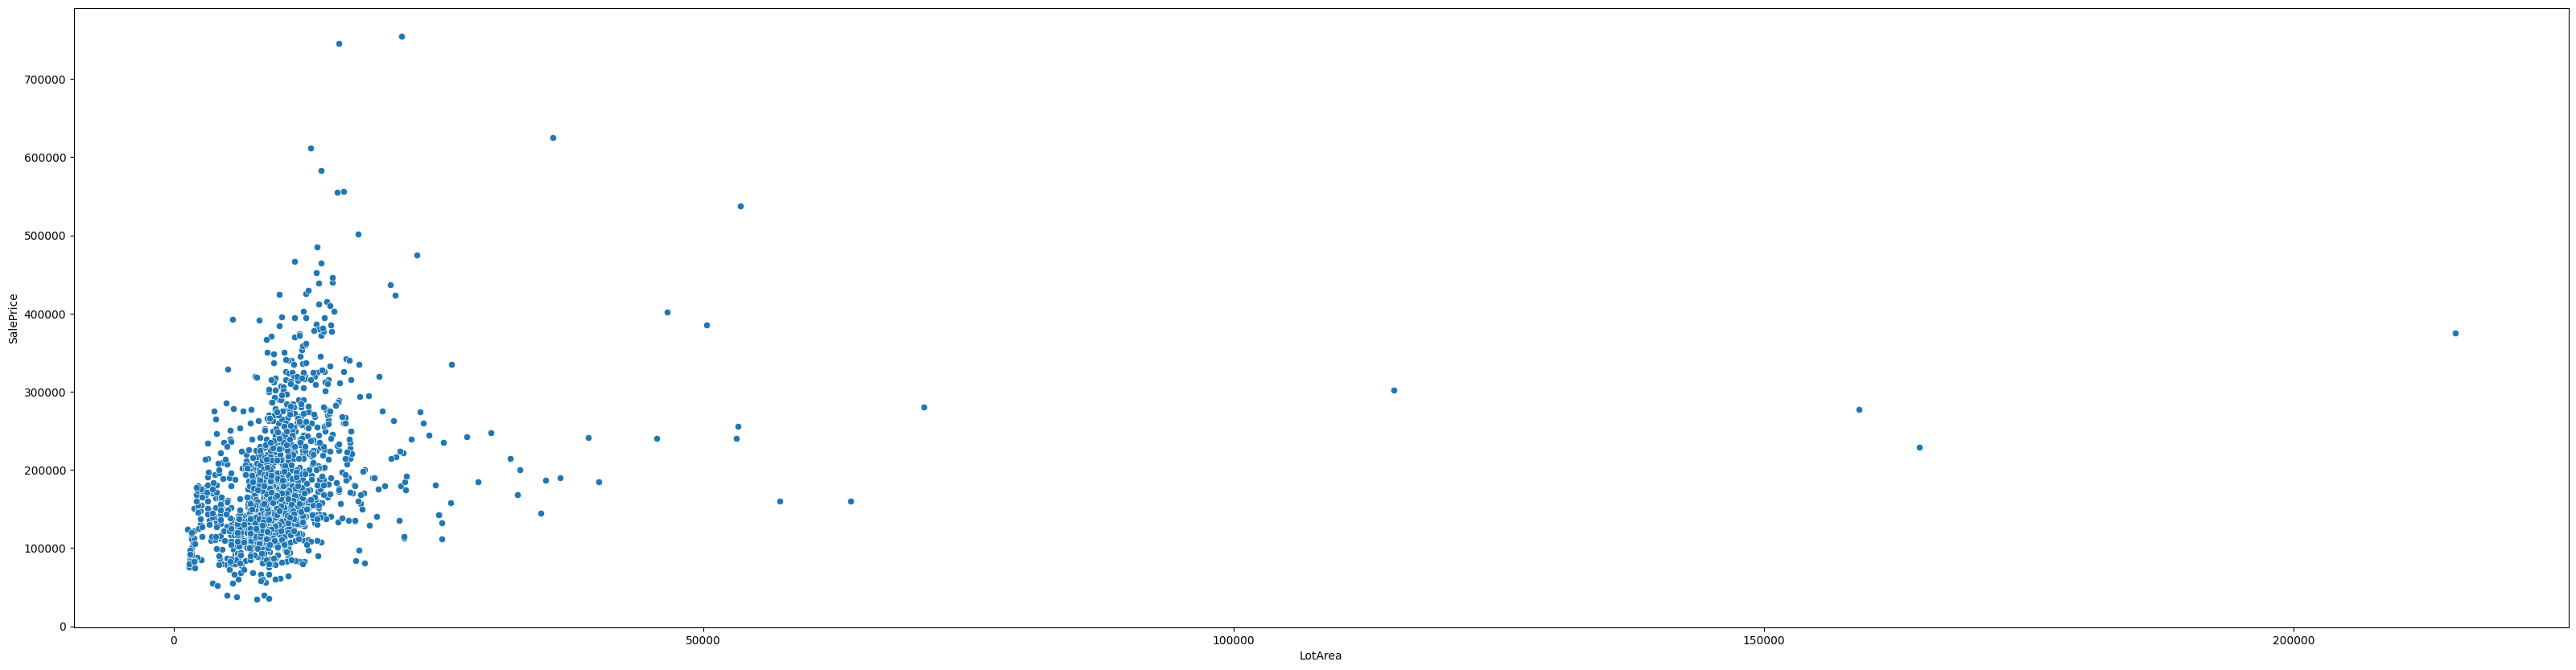

In [4]:
sns.scatterplot(data=df_numeric,x='LotArea',y='SalePrice')
plt.show()

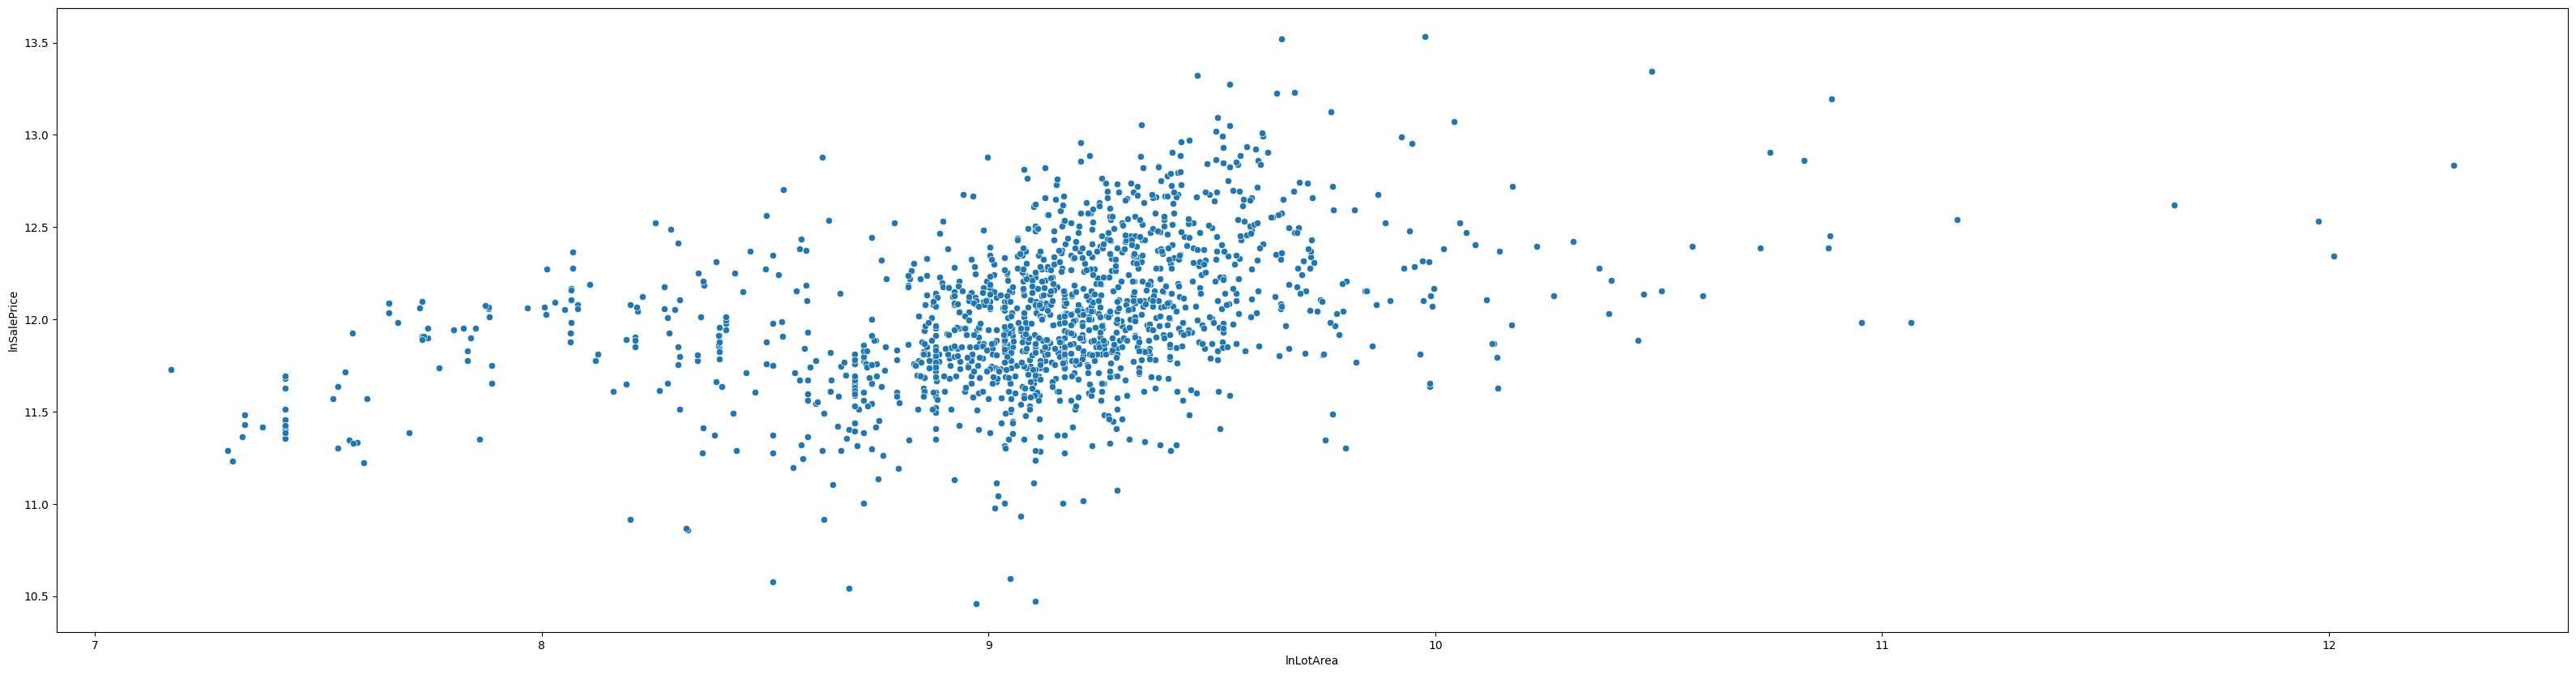

In [5]:

df_transform=df_numeric
df_transform['lnLotArea']=np.log(df_transform['LotArea'])
df_transform['lnSalePrice']=np.log(df_transform['SalePrice'])
sns.scatterplot(data=df_transform,x='lnLotArea',y='lnSalePrice')
plt.show()

:  The r2 is:  0.06523738139587199
:  The rmse is:  5585128941.063667


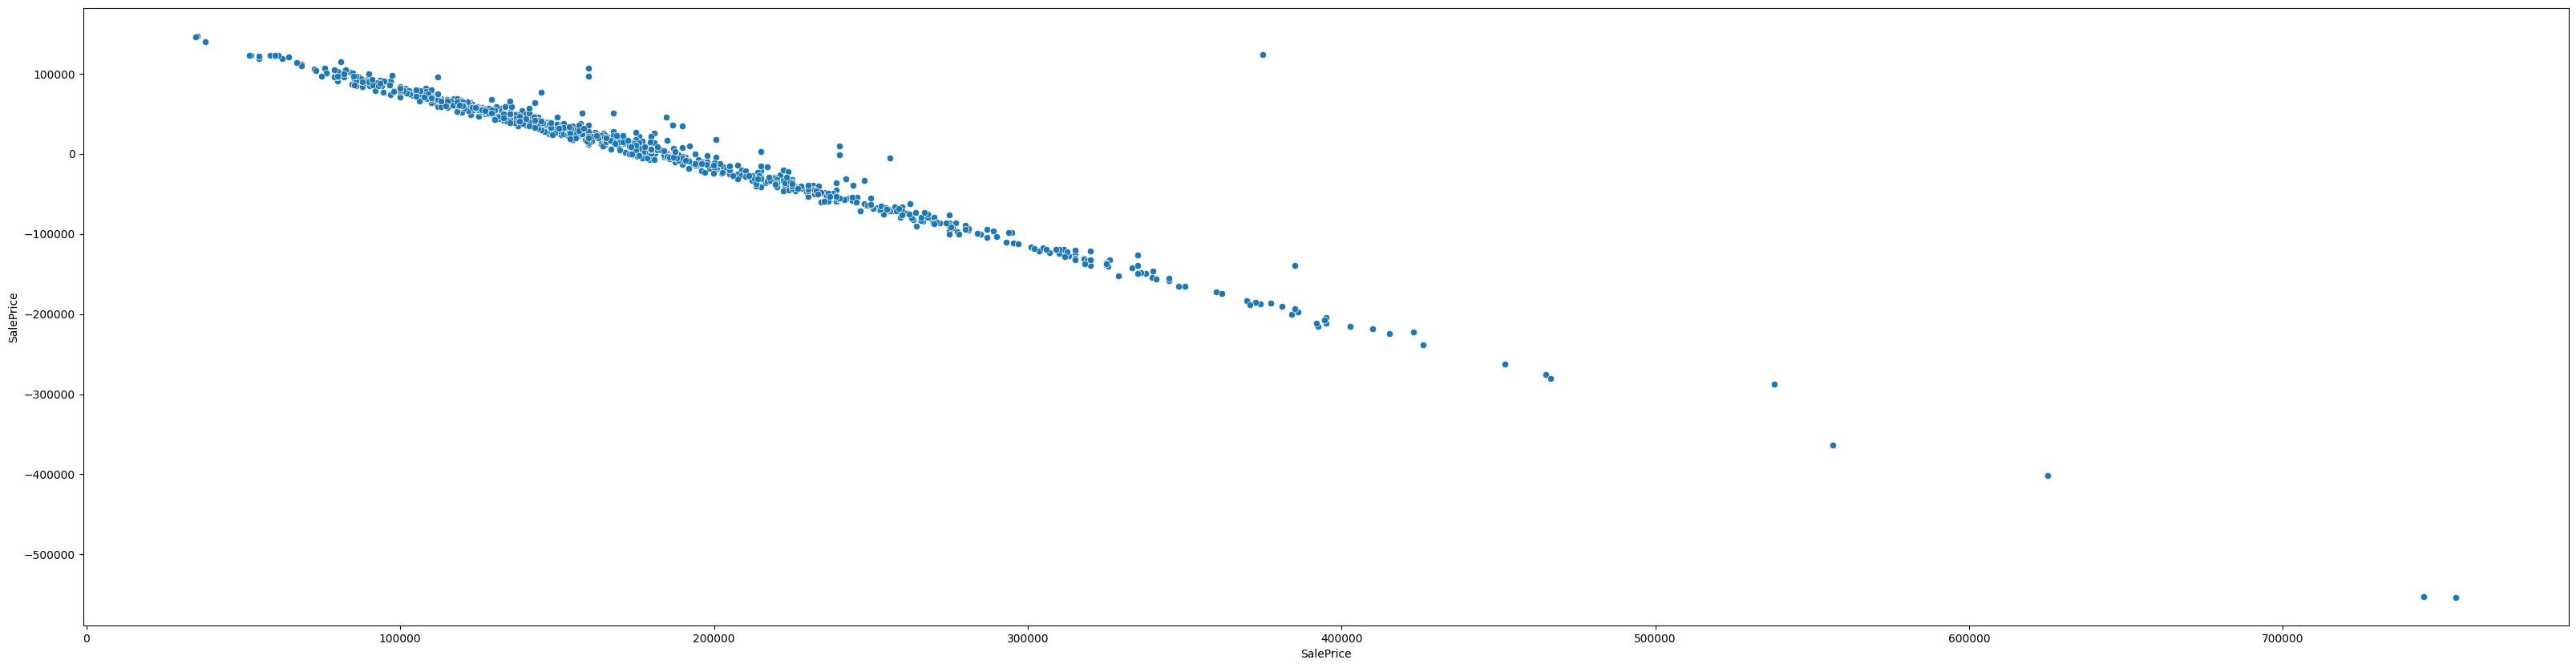

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.model_selection import train_test_split

X=df_transform['LotArea']
y=df_transform['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)
model.fit(X_train.to_numpy().reshape(-1, 1), y_train)
from sklearn.metrics import mean_squared_error, r2_score
predictions = model.predict(X_test.to_numpy().reshape(-1,1))
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions)

print(':  The r2 is: ', r2)
print(':  The rmse is: ', rmse)

sns.scatterplot(x=y_test,y=predictions-y_test)
plt.show()

:  The r2 is:  0.06601814372042114
:  The rmse is:  0.147399137633619


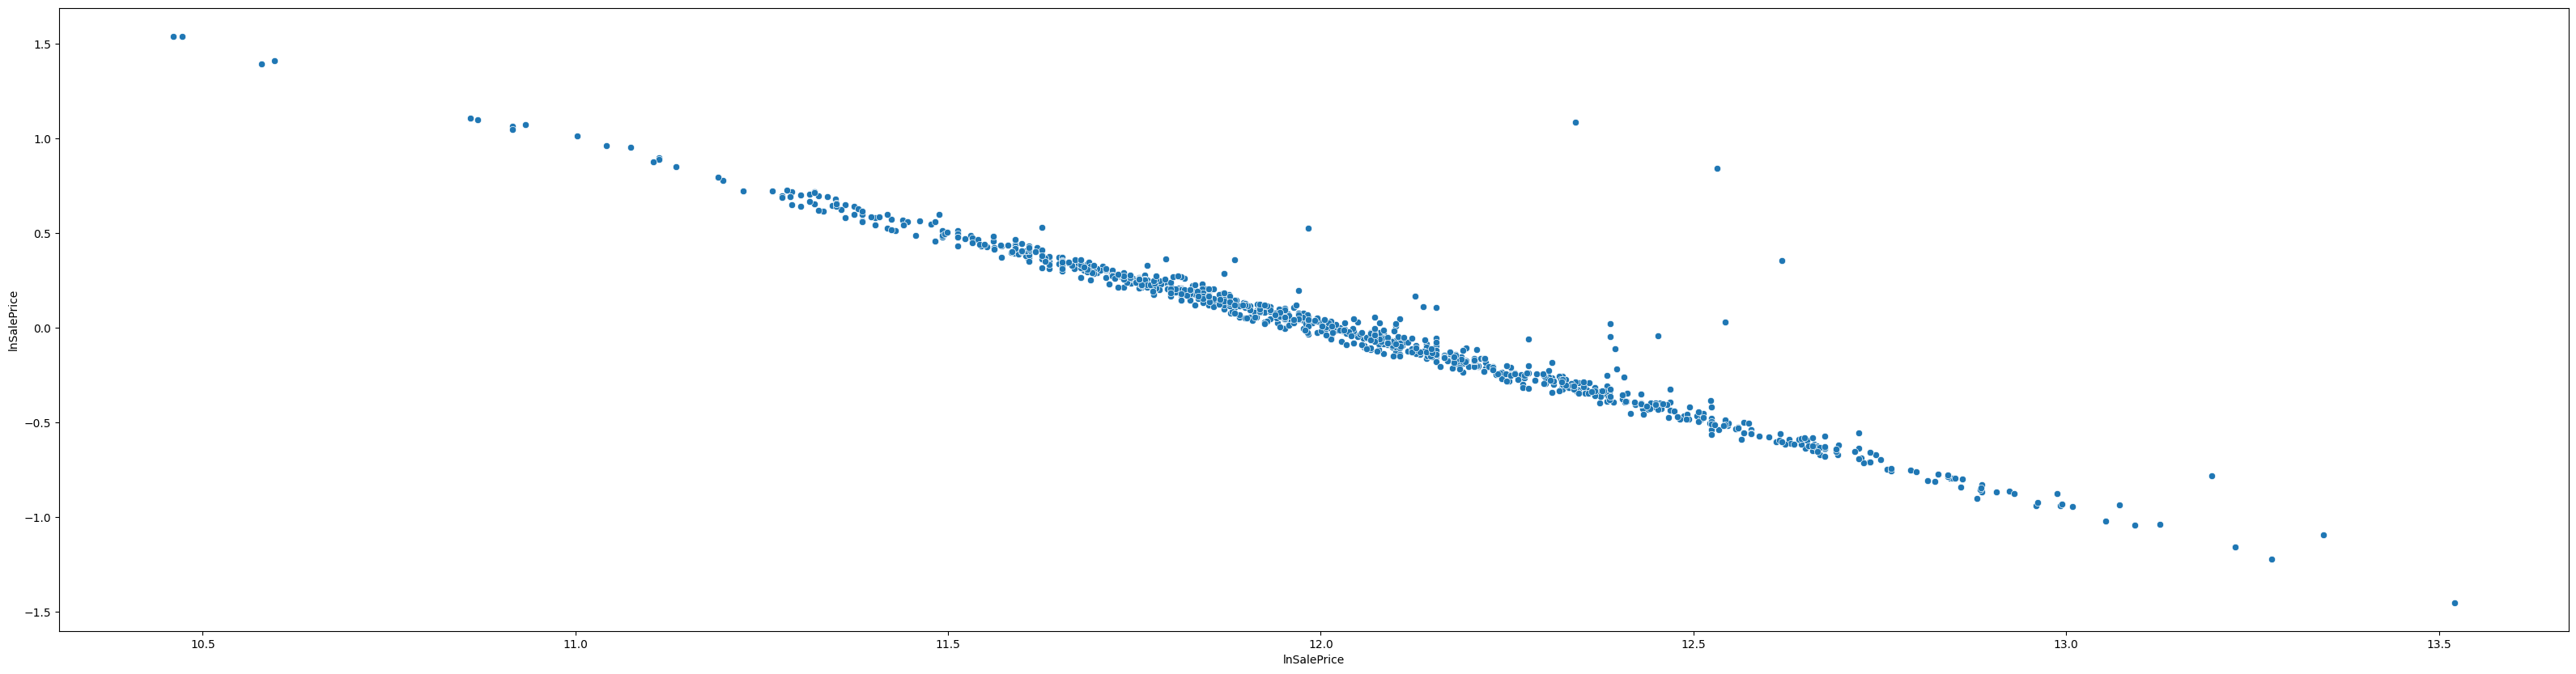

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.model_selection import train_test_split

X=df_transform['LotArea']
y=df_transform['lnSalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)
model.fit(X_train.to_numpy().reshape(-1, 1), y_train)
from sklearn.metrics import mean_squared_error, r2_score
predictions = model.predict(X_test.to_numpy().reshape(-1,1))
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions)

print(':  The r2 is: ', r2)
print(':  The rmse is: ', rmse)

sns.scatterplot(x=y_test,y=predictions-y_test)
plt.show()

### Scaling and Normalization

In [8]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler=StandardScaler()
minmax=MinMaxScaler()
df_numeric2=df_numeric.drop("SalePrice",axis=1)
df_numeric_scaler=scaler.fit_transform(df_numeric2)
df_numeric_scaler = pd.DataFrame(df_numeric_scaler, index=df_numeric2.index, columns=df_numeric2.columns)
df_numeric_scaler['SalePrice']=df_numeric['SalePrice']
df_numeric_norm=minmax.fit_transform(df_numeric2)
df_numeric_norm = pd.DataFrame(df_numeric_norm, index=df_numeric2.index, columns=df_numeric2.columns)
df_numeric_norm['SalePrice']=df_numeric['SalePrice']
for column in df_numeric:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df_numeric, x=column)
        
#Lot Area
#Base Area
#Garage Area
#Garage Cars

C:\Users\ankommar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


In [9]:
for column in df_numeric2:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df_numeric_scaler, x=column)

In [10]:
for column in df_numeric2:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df_numeric_norm, x=column)


In [11]:
# import matplotlib.pyplot as plt

# for column in df_numeric:
#         plt.figure(figsize=(17,1))
#         sns.histplot(data=df_numeric, x=column)

### Categorical Variables

In [12]:
col_list=df_categorical.isna().sum().to_dict()
final=[]
for k,v in col_list.items():
    if(v==0):
        final.append(k)
df_categorical2=df_categorical[final]
df_categorical2

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,PConc,GasA,Ex,Y,TA,Typ,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,CBlock,GasA,TA,Y,TA,Min1,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Stone,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,TA,CBlock,GasA,Gd,Y,Gd,Typ,Y,WD,Normal


In [13]:
# dict( zip( df_categorical['MSZoning'].cat.codes, df_categorical['MSZoning'] ) )
cat_dict={}
for c in list(df_categorical2.columns):
    df_categorical2[c] = df_categorical2[c].astype('category')
    temp_c=dict(zip(df_categorical2[c].cat.codes, df_categorical2[c]))
    cat_dict[c]=list(temp_c.values())

C:\Users\ankommar\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [14]:
cat_dict

{'MSZoning': ['RL', 'RM', 'C (all)', 'FV', 'RH'],
 'Street': ['Pave', 'Grvl'],
 'LotShape': ['Reg', 'IR1', 'IR2', 'IR3'],
 'LandContour': ['Lvl', 'Bnk', 'Low', 'HLS'],
 'Utilities': ['AllPub', 'NoSeWa'],
 'LotConfig': ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'],
 'LandSlope': ['Gtl', 'Mod', 'Sev'],
 'Neighborhood': ['CollgCr',
  'Veenker',
  'Crawfor',
  'NoRidge',
  'Mitchel',
  'Somerst',
  'NWAmes',
  'OldTown',
  'BrkSide',
  'Sawyer',
  'NridgHt',
  'NAmes',
  'SawyerW',
  'IDOTRR',
  'MeadowV',
  'Edwards',
  'Timber',
  'Gilbert',
  'StoneBr',
  'ClearCr',
  'NPkVill',
  'Blmngtn',
  'BrDale',
  'SWISU',
  'Blueste'],
 'Condition1': ['Norm',
  'Feedr',
  'PosN',
  'Artery',
  'RRAe',
  'RRNn',
  'RRAn',
  'PosA',
  'RRNe'],
 'Condition2': ['Norm',
  'Artery',
  'RRNn',
  'Feedr',
  'PosN',
  'PosA',
  'RRAn',
  'RRAe'],
 'BldgType': ['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'],
 'HouseStyle': ['2Story',
  '1Story',
  '1.5Fin',
  '1.5Unf',
  'SFoyer',
  'SLvl',
  '2.5Unf',
 

#### One Hot Encoder

In [15]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

class CategoricalOneHot(BaseEstimator, TransformerMixin):
    def __init__(self, list_key_words=None):
        self.oh_dict = {}
        self.list_key_words = list_key_words

    def fit(self, X, y=None):
        self.list_cat_col = []
        for key_word in self.list_key_words:
            self.list_cat_col = self.list_key_words
#             += [col for col in X.columns if key_word in col]
        for col in self.list_cat_col:
            oh = OneHotEncoder(handle_unknown="ignore", sparse=False)
            oh.fit(X[[col]])
            names = oh.get_feature_names()
            names2 = []
            for nam in names:
                names2.append(col+"_"+nam)
            self.oh_dict[col] = (oh, names2)
        return self

    def transform(self, X):
        _X = X.copy()
        for col in self.list_cat_col:
            oh = self.oh_dict[col][0]
            df_oh = pd.DataFrame(
                data=oh.transform(_X[[col]]),
                columns=self.oh_dict[col][1],
                index=_X.index)
            _X = pd.concat([_X, df_oh], axis=1)
            _X.drop(col, axis=1, inplace=True)
        return _X

    
class CategoricalOrdinal(BaseEstimator, TransformerMixin):
    def __init__(self, list_key_words=None):
        self.oh_dict = {}
        self.list_key_words = list_key_words

    def fit(self, X, y=None):
        self.list_cat_col = []
        for key_word in self.list_key_words:
            self.list_cat_col = self.list_key_words
#             += [col for col in X.columns if key_word in col]
        for col in self.list_cat_col:
            oh = OrdinalEncoder()
            oh.fit(X[[col]])
            self.oh_dict[col] = (oh, col)            
        return self

    def transform(self, X):
        _X = X.copy()
        for col in self.list_cat_col:
            
            oh = self.oh_dict[col][0]
            df_oh = pd.DataFrame(
                data=oh.transform(_X[[col]]),
                columns=[col+"_ordinal"],
                index=_X.index)
            _X = pd.concat([_X, df_oh], axis=1)
            _X.drop(col, axis=1, inplace=True)
            
        return _X
    

if __name__ == "__main__":
    #['BldgType']
    coh = CategoricalOneHot(list_key_words=list(df_categorical2.columns))
    df_categorical_ohe=(coh.fit_transform(df_categorical2))
    
#     coh = CategoricalOrdinal(list_key_words=list(df_categorical2.columns))
#     df_categorical_ohe=(coh.fit_transform(df_categorical2))

df_categorical_ohe

,MSZoning_x0_C (all),MSZoning_x0_FV,MSZoning_x0_RH,MSZoning_x0_RL,MSZoning_x0_RM,Street_x0_Grvl,Street_x0_Pave,LotShape_x0_IR1,LotShape_x0_IR2,LotShape_x0_IR3,...,SaleType_x0_ConLw,SaleType_x0_New,SaleType_x0_Oth,SaleType_x0_WD,SaleCondition_x0_Abnorml,SaleCondition_x0_AdjLand,SaleCondition_x0_Alloca,SaleCondition_x0_Family,SaleCondition_x0_Normal,SaleCondition_x0_Partial
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
import pandas as pd
import numpy as np
import gc, copy
from gensim.models import Word2Vec # categorical feature to vectors
from random import shuffle
import hypertools as hyp
import warnings
warnings.filterwarnings('ignore')

cat_cols=['Neighborhood']
def apply_w2v(sentences, model, num_features):
    def _average_word_vectors(words, model, vocabulary, num_features):
        feature_vector = np.zeros((num_features,), dtype="float64")
        n_words = 0.
        for word in words:
            if word in vocabulary: 
                n_words = n_words + 1.
                feature_vector = np.add(feature_vector, model[word])

        if n_words:
            feature_vector = np.divide(feature_vector, n_words)
        return feature_vector
    
    vocab = set(model.wv.index2word)
    feats = [_average_word_vectors(s, model, vocab, num_features) for s in sentences]
    return np.array(feats)
def gen_cat2vec_sentences(data):
    X_w2v = copy.deepcopy(data)
    names = list(X_w2v.columns.values)
    for c in names:
        X_w2v[c] = X_w2v[c].fillna('unknow').astype('category')
        X_w2v[c].cat.categories = ["%s %s" % (c,g) for g in X_w2v[c].cat.categories]
    X_w2v = X_w2v.values.tolist()
    return X_w2v
n_cat2vec_feature  = len(cat_cols) # define the cat2vecs dimentions
n_cat2vec_window   = len(cat_cols) * 2 # define the w2v window size
def fit_cat2vec_model():
    X_w2v = gen_cat2vec_sentences(df.loc[:,cat_cols].sample(frac=0.6))
    for i in X_w2v:
        shuffle(i)
    model = Word2Vec(X_w2v, size=n_cat2vec_feature, window=n_cat2vec_window)
    return model

print('Fit cat2vec model')
c2v_model = fit_cat2vec_model()
tr_c2v_matrix = apply_w2v(gen_cat2vec_sentences(df.loc[df.index,cat_cols]), c2v_model, n_cat2vec_feature)
tr_c2v_matrix.shape

Fit cat2vec model


(1460, 1)

### Time variables


In [17]:
fitbit2=fitbit[fitbit.Id==1503960366]
fitbit2['Time']=pd.to_datetime(fitbit2['ActivityMinute'])
fitbit2['Hour']=fitbit2['Time'].dt.to_period('H')
fitbit2['Date']=fitbit2['Time'].dt.date
fitbit2['Dayoftheweek']=fitbit2['Time'].dt.weekday
fitbit2['IsWeekend']=np.where(fitbit2['Dayoftheweek']>=5, 'YES','NO')
fitbit2


,Id,ActivityMinute,Steps,Time,Hour,Date,Dayoftheweek,IsWeekend
0,1503960366,4/12/2016 12:00:00 AM,0,2016-04-12 00:00:00,2016-04-12 00:00,2016-04-12,1,NO
1,1503960366,4/12/2016 12:01:00 AM,0,2016-04-12 00:01:00,2016-04-12 00:00,2016-04-12,1,NO
2,1503960366,4/12/2016 12:02:00 AM,0,2016-04-12 00:02:00,2016-04-12 00:00,2016-04-12,1,NO
3,1503960366,4/12/2016 12:03:00 AM,0,2016-04-12 00:03:00,2016-04-12 00:00,2016-04-12,1,NO
4,1503960366,4/12/2016 12:04:00 AM,0,2016-04-12 00:04:00,2016-04-12 00:00,2016-04-12,1,NO
...,...,...,...,...,...,...,...,...
43015,1503960366,5/11/2016 8:55:00 PM,0,2016-05-11 20:55:00,2016-05-11 20:00,2016-05-11,2,NO
43016,1503960366,5/11/2016 8:56:00 PM,0,2016-05-11 20:56:00,2016-05-11 20:00,2016-05-11,2,NO
43017,1503960366,5/11/2016 8:57:00 PM,0,2016-05-11 20:57:00,2016-05-11 20:00,2016-05-11,2,NO
43018,1503960366,5/11/2016 8:58:00 PM,0,2016-05-11 20:58:00,2016-05-11 20:00,2016-05-11,2,NO


In [18]:
fitbit2[fitbit2.Dayoftheweek>=4].sort_values('Hour')

,Id,ActivityMinute,Steps,Time,Hour,Date,Dayoftheweek,IsWeekend
4320,1503960366,4/15/2016 12:00:00 AM,0,2016-04-15 00:00:00,2016-04-15 00:00,2016-04-15,4,NO
4352,1503960366,4/15/2016 12:32:00 AM,0,2016-04-15 00:32:00,2016-04-15 00:00,2016-04-15,4,NO
4353,1503960366,4/15/2016 12:33:00 AM,0,2016-04-15 00:33:00,2016-04-15 00:00,2016-04-15,4,NO
4354,1503960366,4/15/2016 12:34:00 AM,0,2016-04-15 00:34:00,2016-04-15 00:00,2016-04-15,4,NO
4355,1503960366,4/15/2016 12:35:00 AM,0,2016-04-15 00:35:00,2016-04-15 00:00,2016-04-15,4,NO
...,...,...,...,...,...,...,...,...
38844,1503960366,5/8/2016 11:24:00 PM,0,2016-05-08 23:24:00,2016-05-08 23:00,2016-05-08,6,YES
38845,1503960366,5/8/2016 11:25:00 PM,0,2016-05-08 23:25:00,2016-05-08 23:00,2016-05-08,6,YES
38846,1503960366,5/8/2016 11:26:00 PM,0,2016-05-08 23:26:00,2016-05-08 23:00,2016-05-08,6,YES
38848,1503960366,5/8/2016 11:28:00 PM,0,2016-05-08 23:28:00,2016-05-08 23:00,2016-05-08,6,YES


In [19]:
# sns.boxplot(data=fitbit2,y='Steps',x='Date',palette='colorblind')

In [20]:
fitbit2_hourly=fitbit2.groupby(['Hour'])['Steps'].sum().reset_index()
fitbit2_hourly['previous_day_same_hour']=fitbit2_hourly.sort_values(['Hour'])['Steps'].shift(24)
fitbit2_hourly['cumsum_steps_in_past24hours']=fitbit2_hourly.Steps.rolling(window=24).sum()
fitbit2_hourly.dropna()


,Hour,Steps,previous_day_same_hour,cumsum_steps_in_past24hours
24,2016-04-13 00:00,144,373.0,12929.0
25,2016-04-13 01:00,0,160.0,12769.0
26,2016-04-13 02:00,0,151.0,12618.0
27,2016-04-13 03:00,36,0.0,12654.0
28,2016-04-13 04:00,0,0.0,12654.0
...,...,...,...,...
712,2016-05-11 16:00,289,312.0,14011.0
713,2016-05-11 17:00,245,645.0,13611.0
714,2016-05-11 18:00,3449,2494.0,14566.0
715,2016-05-11 19:00,293,1418.0,13441.0


### Text Data


In [21]:
from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog."]
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
(1, 8)
<class 'scipy.sparse.csr.csr_matrix'>
[[1 1 1 1 1 1 1 2]]


In [22]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
text = boats.dropna().Summary
vectorizer = CountVectorizer()
vectorizer.fit(text)
vector = vectorizer.transform(text)
newdf=pd.DataFrame(vector.toarray(), columns=list(vectorizer.vocabulary_.keys()))
newdf=pd.concat([boats,newdf], axis=1)

In [23]:
newdf

,ProductName,ProductPrice,Discount,NumberofReviews,Rate,Review,Summary,very,good,product,...,sales,staff,nehave,flexibility,provides,bonus,rockers,375,purpose,comfort
0,Stone 1000v2,"\nSale price₹ 3,999",43% off,7 reviews,★\n 5.0\n,Fantastic product,Very good product in this price range..,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Stone 1000v2,"Sale price₹ 3,999",43% off,7 reviews,★\n 5.0\n,Outstanding,Outstanding Product,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Stone 1000v2,"\nSale price₹ 3,999",43% off,7 reviews,★\n 5.0\n,Awesome,Works like a charm. Good sound quality. Visual...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Stone 1000v2,"\nSale price₹ 3,999",43% off,7 reviews,★\n 5.0\n,Boat stone 1000 v2,Great,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Stone 1000v2,"\nSale price₹ 3,999",43% off,7 reviews,★\n 5.0\n,Quality sound,Amazing sound quality.totally premium.&.afford...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,Trebel Rockerz 255 Pro+,"\nSale price₹ 1,599",60% off,7 reviews,★\n 4.7\n,Awesome product,I am using this since 10 months and fully sati...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1445,Trebel Rockerz 255 Pro+,"\nSale price₹ 1,599",60% off,7 reviews,★\n 4.7\n,Awesome,Sound quality good best Material,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1446,Trebel Rockerz 255 Pro+,"\nSale price₹ 1,599",60% off,7 reviews,★\n 4.7\n,Best service,Best service and best product very staisfied,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1447,Trebel Rockerz 255 Pro+,"\nSale price₹ 1,599",60% off,7 reviews,★\n 4.7\n,Worthy deal except the ipl tickets :|,"Haven't heard my friends saying,"" tu earphones...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
text = boats.dropna().Summary
vectorizer = TfidfVectorizer()
vectorizer.fit(text)
vector = vectorizer.transform(text)

print(vectorizer.vocabulary_)
print(vectorizer.idf_)
newdf=pd.DataFrame(vector.toarray(), columns=list(vectorizer.get_feature_names()))
newdf=pd.concat([boats,newdf], axis=1)


{'very': 1107, 'good': 491, 'product': 820, 'in': 560, 'this': 1046, 'price': 814, 'range': 843, 'outstanding': 754, 'works': 1164, 'like': 618, 'charm': 252, 'sound': 960, 'quality': 835, 'visually': 1109, 'more': 684, 'attractive': 124, 'than': 1028, 'v1': 1101, 'great': 497, 'amazing': 96, 'totally': 1061, 'premium': 808, 'affordable': 71, 'nice': 710, 'and': 105, 'where': 1140, 'is': 579, 'flight': 456, 'best': 167, 'add': 65, 'usb': 1093, 'hub': 549, 'also': 88, 'audio': 125, 'quite': 841, 'loud': 636, 'wonderfull': 1158, 'rating': 847, 'battery': 150, 'backup': 138, 'looking': 631, 'material': 659, 'bluetooth': 189, 'connectivity': 291, 'charging': 251, 'speed': 968, 'better': 171, 'with': 1154, 'bass': 146, 'iam': 551, 'happy': 511, 'superb': 1008, 'of': 723, 'music': 692, 'experience': 421, 'but': 216, 'expecting': 420, 'type': 1079, 'port': 798, 'for': 461, 'from': 469, 'boat': 190, 'at': 123, 'point': 794, 'really': 851, 'awesome': 133, '10': 1, 'watt': 1126, 'speaker': 963, 

In [25]:
newdf

,ProductName,ProductPrice,Discount,NumberofReviews,Rate,Review,Summary,000,10,100,...,year,years,yes,yoncan,you,your,zero,जग,𝚒𝚝,𝚕𝚒𝚔𝚎
0,Stone 1000v2,"\nSale price₹ 3,999",43% off,7 reviews,★\n 5.0\n,Fantastic product,Very good product in this price range..,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Stone 1000v2,"Sale price₹ 3,999",43% off,7 reviews,★\n 5.0\n,Outstanding,Outstanding Product,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Stone 1000v2,"\nSale price₹ 3,999",43% off,7 reviews,★\n 5.0\n,Awesome,Works like a charm. Good sound quality. Visual...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Stone 1000v2,"\nSale price₹ 3,999",43% off,7 reviews,★\n 5.0\n,Boat stone 1000 v2,Great,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Stone 1000v2,"\nSale price₹ 3,999",43% off,7 reviews,★\n 5.0\n,Quality sound,Amazing sound quality.totally premium.&.afford...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,Trebel Rockerz 255 Pro+,"\nSale price₹ 1,599",60% off,7 reviews,★\n 4.7\n,Awesome product,I am using this since 10 months and fully sati...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1445,Trebel Rockerz 255 Pro+,"\nSale price₹ 1,599",60% off,7 reviews,★\n 4.7\n,Awesome,Sound quality good best Material,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1446,Trebel Rockerz 255 Pro+,"\nSale price₹ 1,599",60% off,7 reviews,★\n 4.7\n,Best service,Best service and best product very staisfied,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1447,Trebel Rockerz 255 Pro+,"\nSale price₹ 1,599",60% off,7 reviews,★\n 4.7\n,Worthy deal except the ipl tickets :|,"Haven't heard my friends saying,"" tu earphones...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
newdf.head(1).to_dict()

{'ProductName': {0: ' Stone 1000v2 '},
 'ProductPrice': {0: '\nSale price₹ 3,999'},
 'Discount': {0: '43% off'},
 'NumberofReviews': {0: '7 reviews'},
 'Rate': {0: '★\n  5.0\n    '},
 'Review': {0: 'Fantastic product'},
 'Summary': {0: 'Very good product in this price range..'},
 '000': {0: 0.0},
 '10': {0: 0.0},
 '100': {0: 0.0},
 '1000': {0: 0.0},
 '100w': {0: 0.0},
 '10days': {0: 0.0},
 '11': {0: 0.0},
 '1299': {0: 0.0},
 '131': {0: 0.0},
 '1350': {0: 0.0},
 '13drivers': {0: 0.0},
 '15': {0: 0.0},
 '152': {0: 0.0},
 '18': {0: 0.0},
 '1m': {0: 0.0},
 '1st': {0: 0.0},
 '2000': {0: 0.0},
 '2021': {0: 0.0},
 '220': {0: 0.0},
 '242': {0: 0.0},
 '245': {0: 0.0},
 '2500': {0: 0.0},
 '255': {0: 0.0},
 '2nd': {0: 0.0},
 '2xl': {0: 0.0},
 '333': {0: 0.0},
 '335': {0: 0.0},
 '350rs': {0: 0.0},
 '375': {0: 0.0},
 '385': {0: 0.0},
 '3k': {0: 0.0},
 '3rd': {0: 0.0},
 '402': {0: 0.0},
 '41pro': {0: 0.0},
 '441': {0: 0.0},
 '50': {0: 0.0},
 '500': {0: 0.0},
 '50mm': {0: 0.0},
 '510': {0: 0.0},
 '53

In [27]:
vectorizer.vocabulary_

{'very': 1107,
 'good': 491,
 'product': 820,
 'in': 560,
 'this': 1046,
 'price': 814,
 'range': 843,
 'outstanding': 754,
 'works': 1164,
 'like': 618,
 'charm': 252,
 'sound': 960,
 'quality': 835,
 'visually': 1109,
 'more': 684,
 'attractive': 124,
 'than': 1028,
 'v1': 1101,
 'great': 497,
 'amazing': 96,
 'totally': 1061,
 'premium': 808,
 'affordable': 71,
 'nice': 710,
 'and': 105,
 'where': 1140,
 'is': 579,
 'flight': 456,
 'best': 167,
 'add': 65,
 'usb': 1093,
 'hub': 549,
 'also': 88,
 'audio': 125,
 'quite': 841,
 'loud': 636,
 'wonderfull': 1158,
 'rating': 847,
 'battery': 150,
 'backup': 138,
 'looking': 631,
 'material': 659,
 'bluetooth': 189,
 'connectivity': 291,
 'charging': 251,
 'speed': 968,
 'better': 171,
 'with': 1154,
 'bass': 146,
 'iam': 551,
 'happy': 511,
 'superb': 1008,
 'of': 723,
 'music': 692,
 'experience': 421,
 'but': 216,
 'expecting': 420,
 'type': 1079,
 'port': 798,
 'for': 461,
 'from': 469,
 'boat': 190,
 'at': 123,
 'point': 794,
 'reall

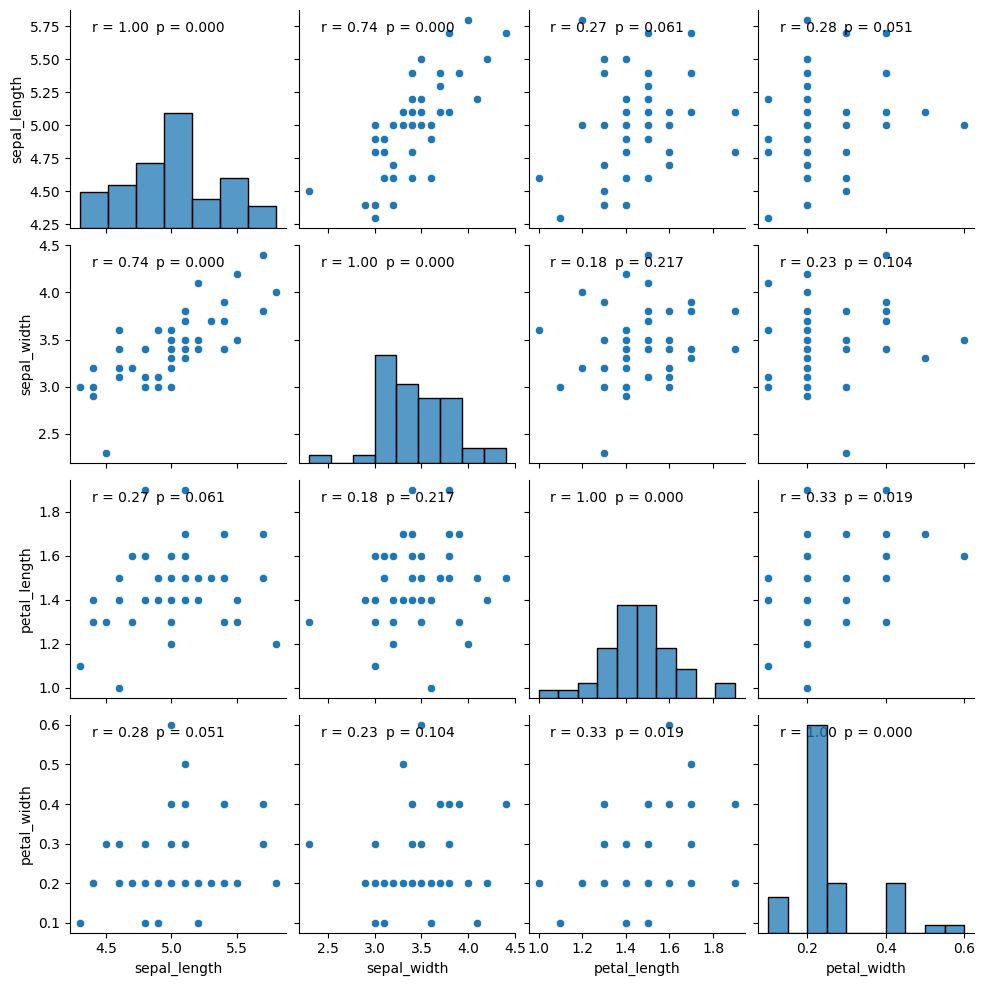

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)

iris_df = sns.load_dataset("iris")
iris_df = iris_df[iris_df["species"] == "setosa"]
graph = sns.pairplot(iris_df)
graph.map(corrfunc)
plt.show()

    Time series - Number of time periods
    Stationarity
    Seasonality
    Auto Correlation

In [29]:
#Simple Linear Regression

In [30]:
stores_agg=stores.groupby("date")['sales'].sum().reset_index()


### Outlier Detection




### Univariate outliers

### Interquartile Range as indicator
### Treatment is removal of the outlier
### Histogram of Sale Price with and without outliers in the data


Old Shape:  (1460, 81)
340075.0 3875.0
New Shape:  (1399, 81)


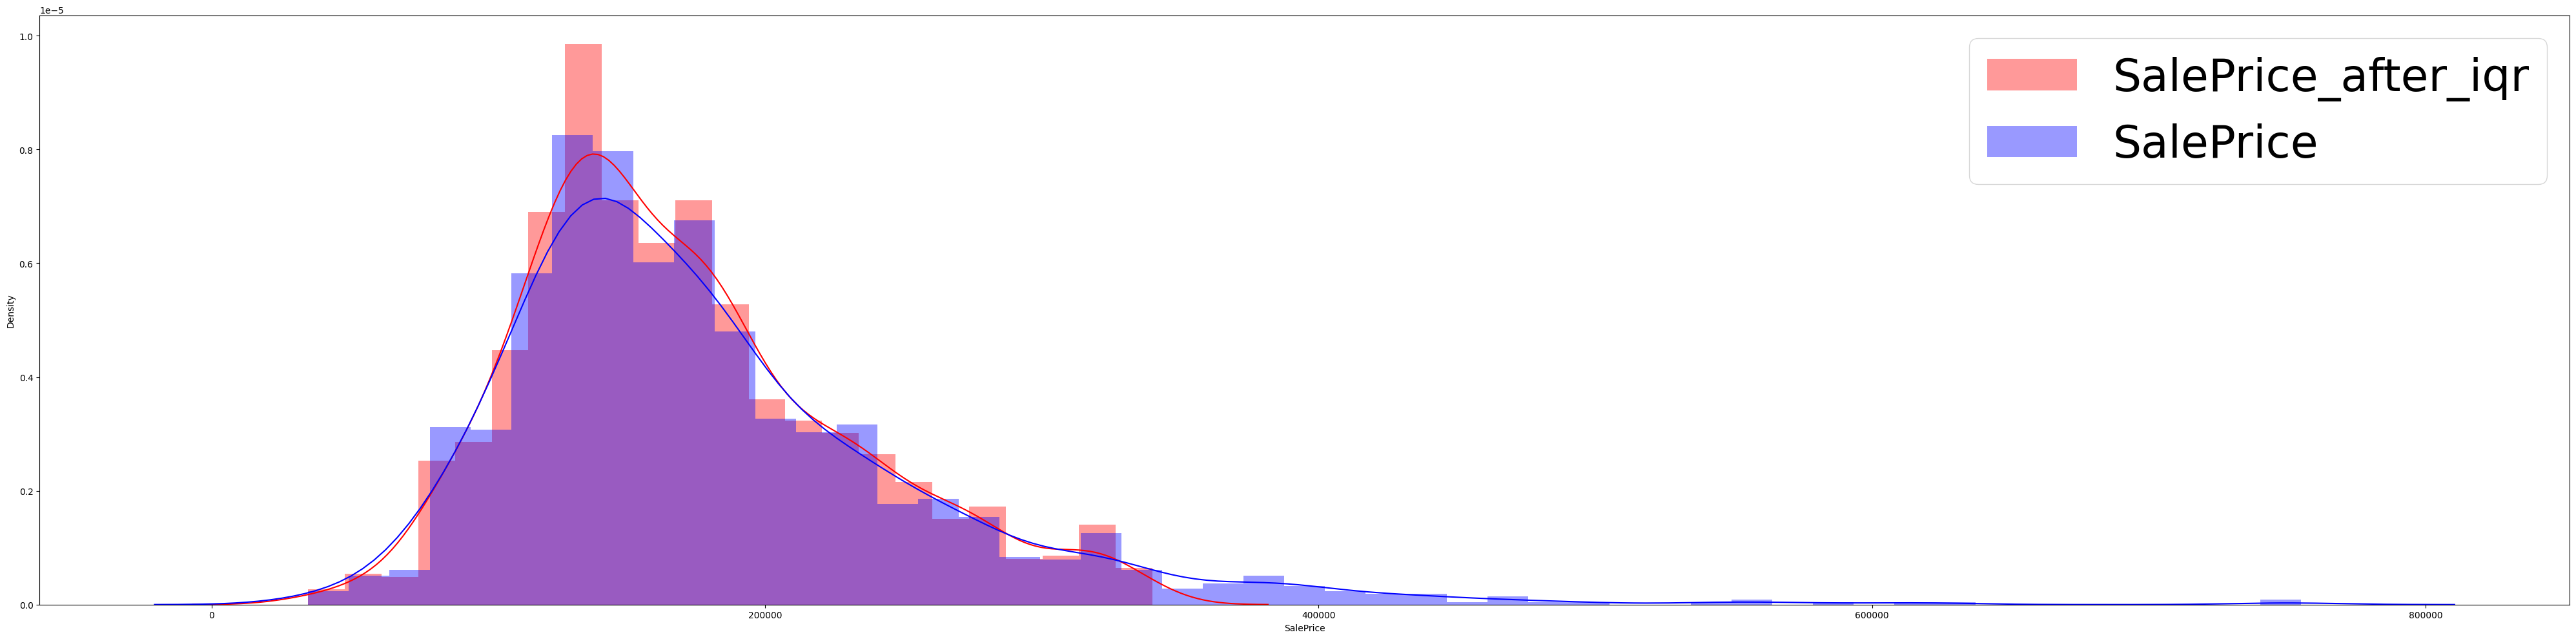

In [32]:
#IQR

df=pd.read_csv("data/house-prices-advanced-regression-techniques/train.csv") #Regression

def iqr(df_iqr,nam):
    Q1 = np.percentile(df_iqr[nam], 25,
                       interpolation = 'midpoint')

    Q3 = np.percentile(df_iqr[nam], 75,
                       interpolation = 'midpoint')
    IQR = Q3 - Q1

    print("Old Shape: ", df_iqr.shape)

    # Upper bound
    upper=Q3+1.5*IQR
    upper_array=np.array(df_iqr[nam]>=upper)
    # Lower bound
    lower=Q1-1.5*IQR
    lower_array=np.array(df_iqr[nam]<=lower)

    print(upper, lower)
    # Removing the outliers
    upper_array
    df_iqr=df_iqr.drop(df_iqr[df_iqr[nam]>=upper].index)
    df_iqr=df_iqr.drop(df_iqr[df_iqr[nam]<=lower].index)

    # df.drop(lower_array[0],inplace=True)

    print("New Shape: ", df_iqr.shape)
    return df_iqr

def plot_hist_outlier(df, nam):
    df_iqr=iqr(df,nam)
    #     plt.rcParams["figure.figsize"] = (40,40)
    plt.figure()
    sns.distplot(a=df_iqr[nam],hist=True,label=nam+"_after_iqr",color='red')
    sns.distplot(a=df[nam],label=nam,color='blue')
    plt.tight_layout()
    #     quantiles=[25,50,75]
    #     colors=['r','b','r']
    #     for q, c in zip(quantiles, colors):
    #         plt.axvline(np.percentile(df_iqr[nam],q), 0, 1, color=c, ls='-',lw=10,label=str(q))
    #     plt.axvline(df_iqr[nam].mean(),0, 1, color='g', ls='-',lw=10,label='Mean') 
    plt.legend(loc='upper right',fontsize =50)
    plt.show()
nam='SalePrice'
plot_hist_outlier(df,nam)

In [33]:
# def GMM(df,nam):
#     import pandas as pd
#     from sklearn.mixture import GaussianMixture
#     import scipy.stats as stats
#     import matplotlib.pyplot as plt
#     h=df[nam].to_numpy()
#     hp=h.reshape(-1, 1)
#     gmm = GaussianMixture(n_components = 5).fit(hp)
#     plt.figure()
#     plt.hist(hp, bins=24,  density=True)
# #     plt.xlim(0, 360)
#     f_axis = hp.copy().ravel()
#     f_axis.sort()
#     a = []
#     for weight, mean, covar in zip(gmm.weights_, gmm.means_, gmm.covariances_):
#         a.append(weight*norm.pdf(f_axis, mean, np.sqrt(covar)).ravel())
#         plt.plot(f_axis, a[-1],linewidth=8)
#     plt.plot(f_axis, np.array(a).sum(axis =0), 'k-')
#     plt.xlabel(nam)
#     plt.ylabel('PDF')
#     plt.tight_layout()
#     plt.show()

# GMM(stores_agg,'sales')

In [34]:
# .plot()

In [35]:
# from pandas import read_csv
# import seaborn as sns
# from matplotlib import pyplot as plt
# import numpy as np
# # left = 0.1
# # bottom = 0.1
# # top = 0.8
# # right = 0.8
# fig = plt.figure(figsize=(10, 10))
# plt.xlabel("SalePrice")
# plt.ylabel("TotalBsmtSF")
# main_ax = plt.axes([left,bottom,right-left,top-bottom])
# top_ax = plt.axes([left,top,right - left,1-top])
# # plt.axis('off')
# right_ax = plt.axes([right,bottom,1-right,top-bottom])
# # plt.axis('off')
# main_ax.plot(df['SalePrice'],  df['TotalBsmtSF'], 'ko', alpha=0.5)
# right_ax.boxplot(df['SalePrice'], notch=True, widths=.6)
# top_ax.boxplot(df['TotalBsmtSF'], vert=False, notch=True, widths=.6)




In [36]:
df2=df[['SalePrice','TotalBsmtSF']]
df2.to_numpy()

array([[208500,    856],
       [181500,   1262],
       [223500,    920],
       ...,
       [266500,   1152],
       [142125,   1078],
       [147500,   1256]], dtype=int64)

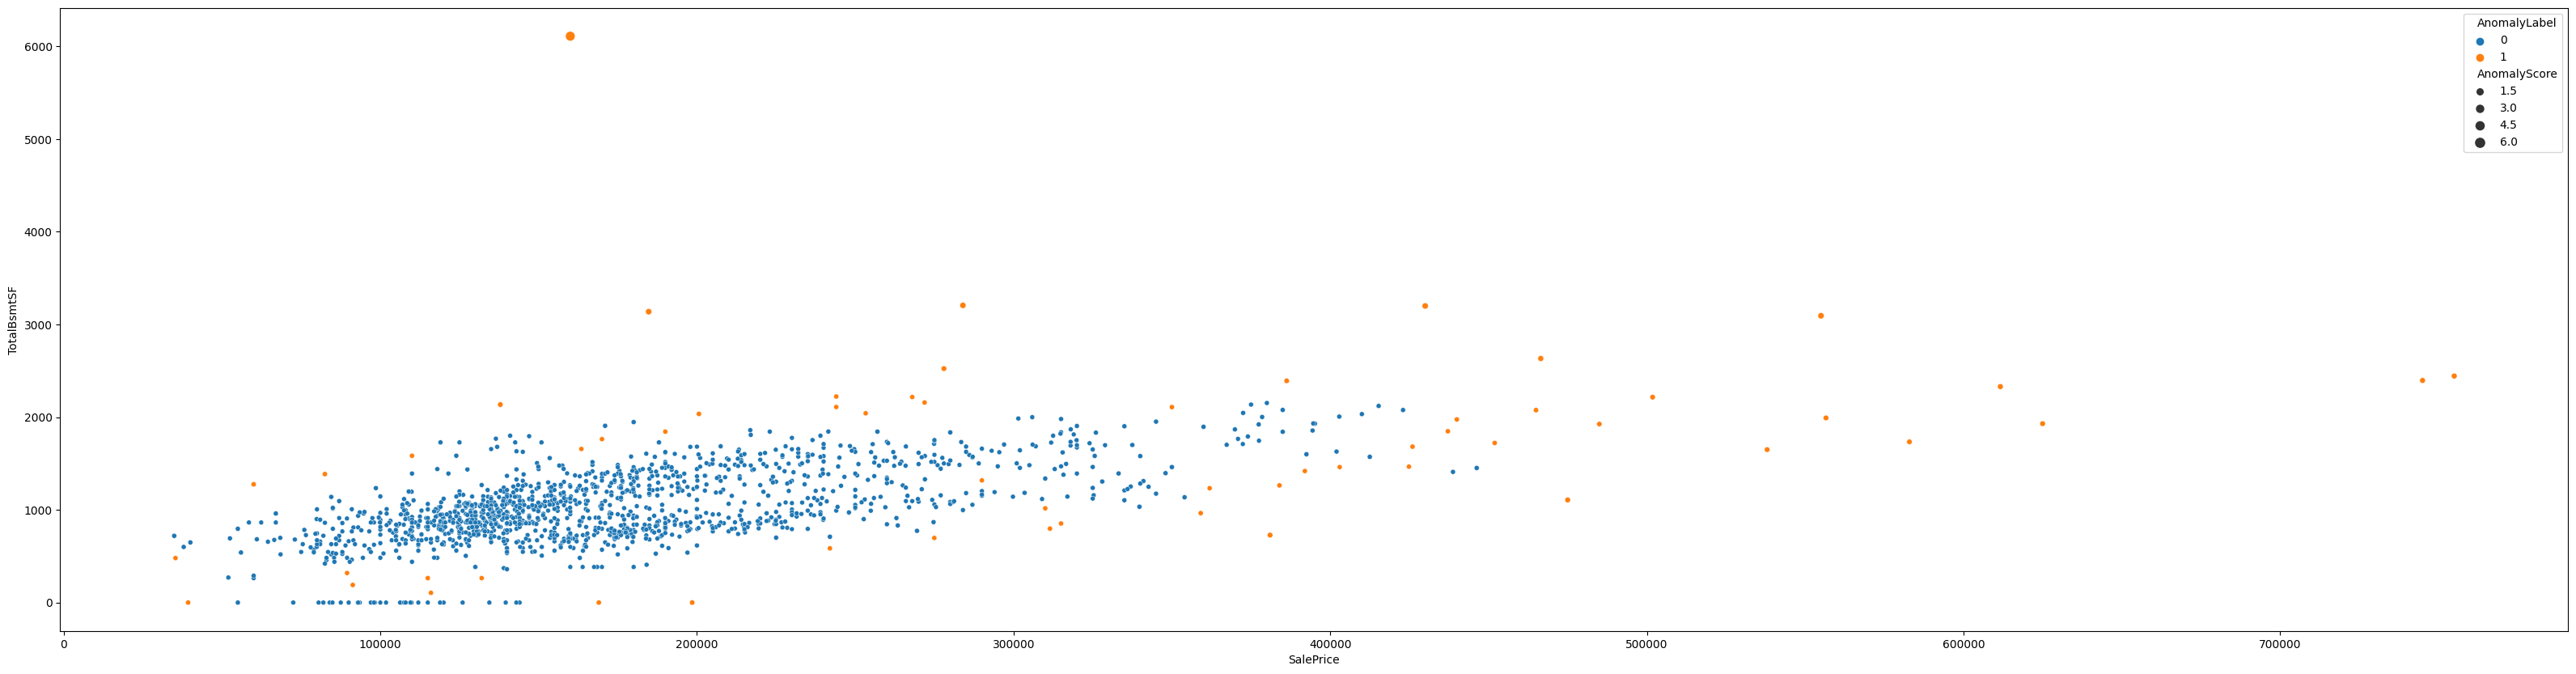

In [37]:
import pandas as pd
from pyod.models.knn import KNN
from pyod.utils.utility import standardizer
from pyod.utils.data import evaluate_print
df2=df[['SalePrice','TotalBsmtSF']]

dfn = standardizer(df2)
clf = KNN(n_neighbors=2,contamination=1/25,method='mean')
clf.fit(dfn)
df2['AnomalyScore'] = clf.decision_scores_
df2['AnomalyLabel'] = clf.labels_

df_knn=df2[df2.AnomalyLabel==0]
sns.scatterplot(data=df2,y='TotalBsmtSF',x='SalePrice',hue='AnomalyLabel',size='AnomalyScore')
plt.show()

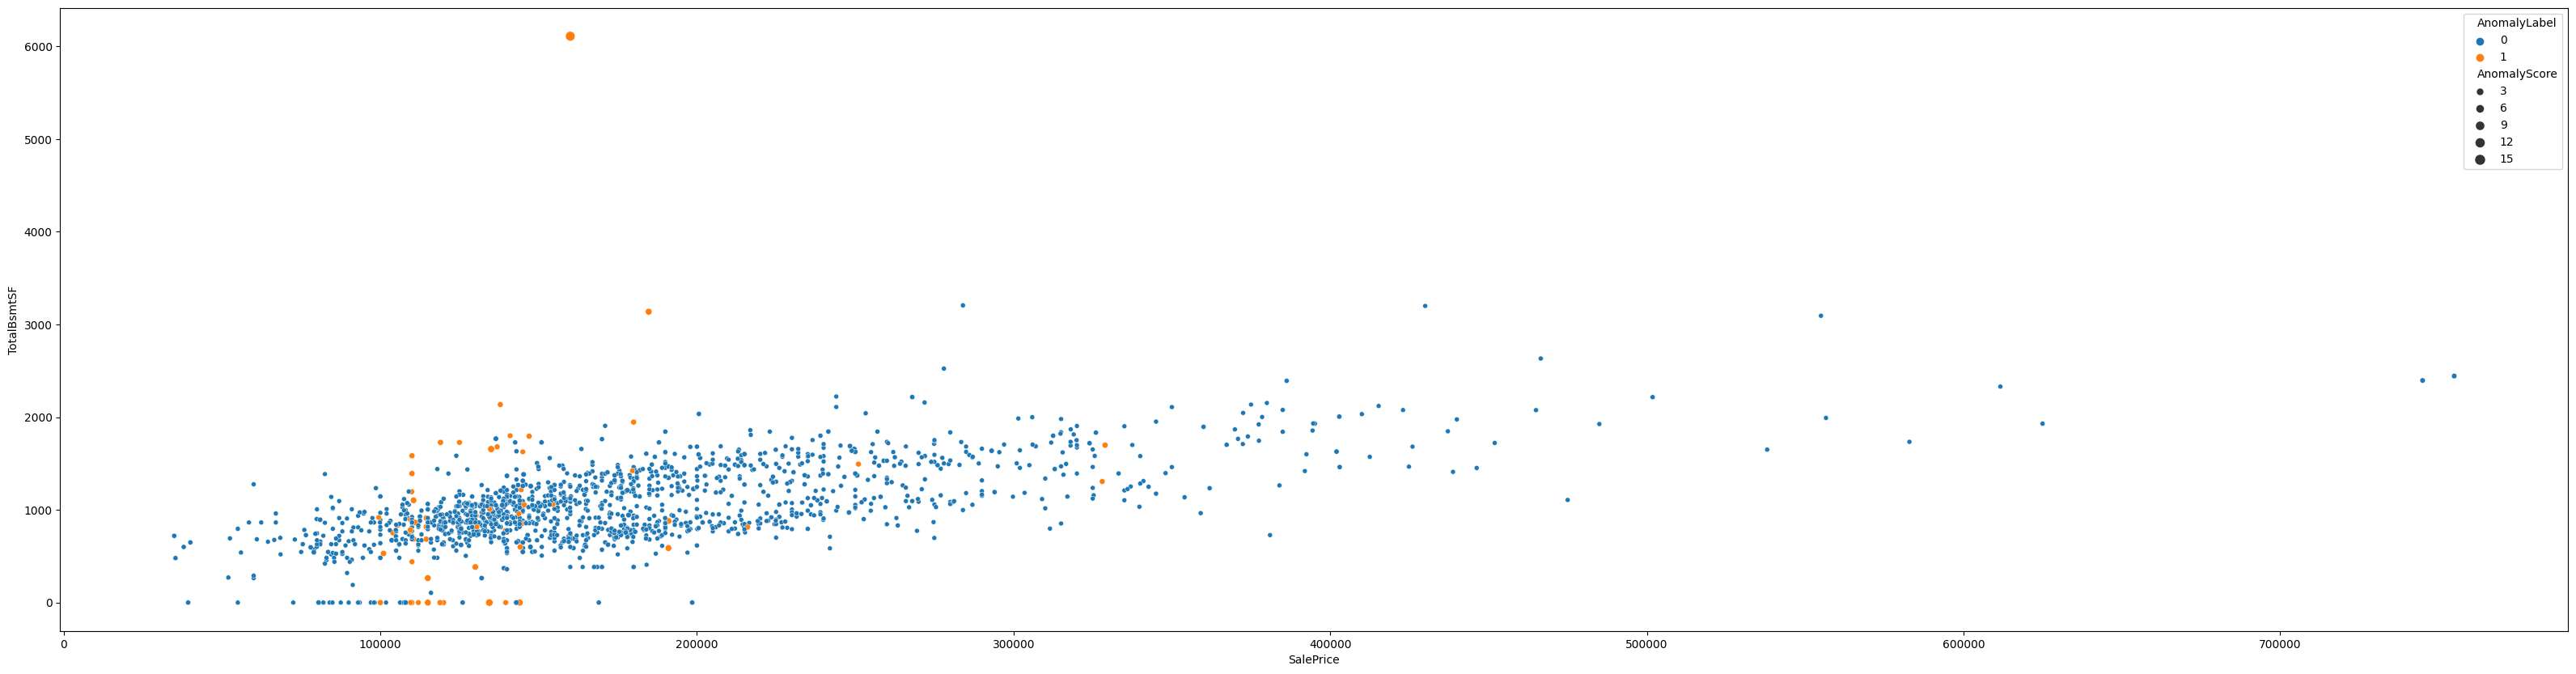

In [38]:
import pandas as pd
from pyod.models.lof import LOF
from pyod.utils.utility import standardizer
from pyod.utils.data import evaluate_print
df2=df[['SalePrice','TotalBsmtSF']]

clf = LOF(n_neighbors=5,contamination=1/25)
clf.fit(df2)
df2['AnomalyScore'] = clf.decision_scores_
df2['AnomalyLabel'] = clf.labels_
sns.scatterplot(data=df2,y='TotalBsmtSF',x='SalePrice',hue='AnomalyLabel',size='AnomalyScore')
df_lof=df2[df2.AnomalyLabel==0]
plt.show()

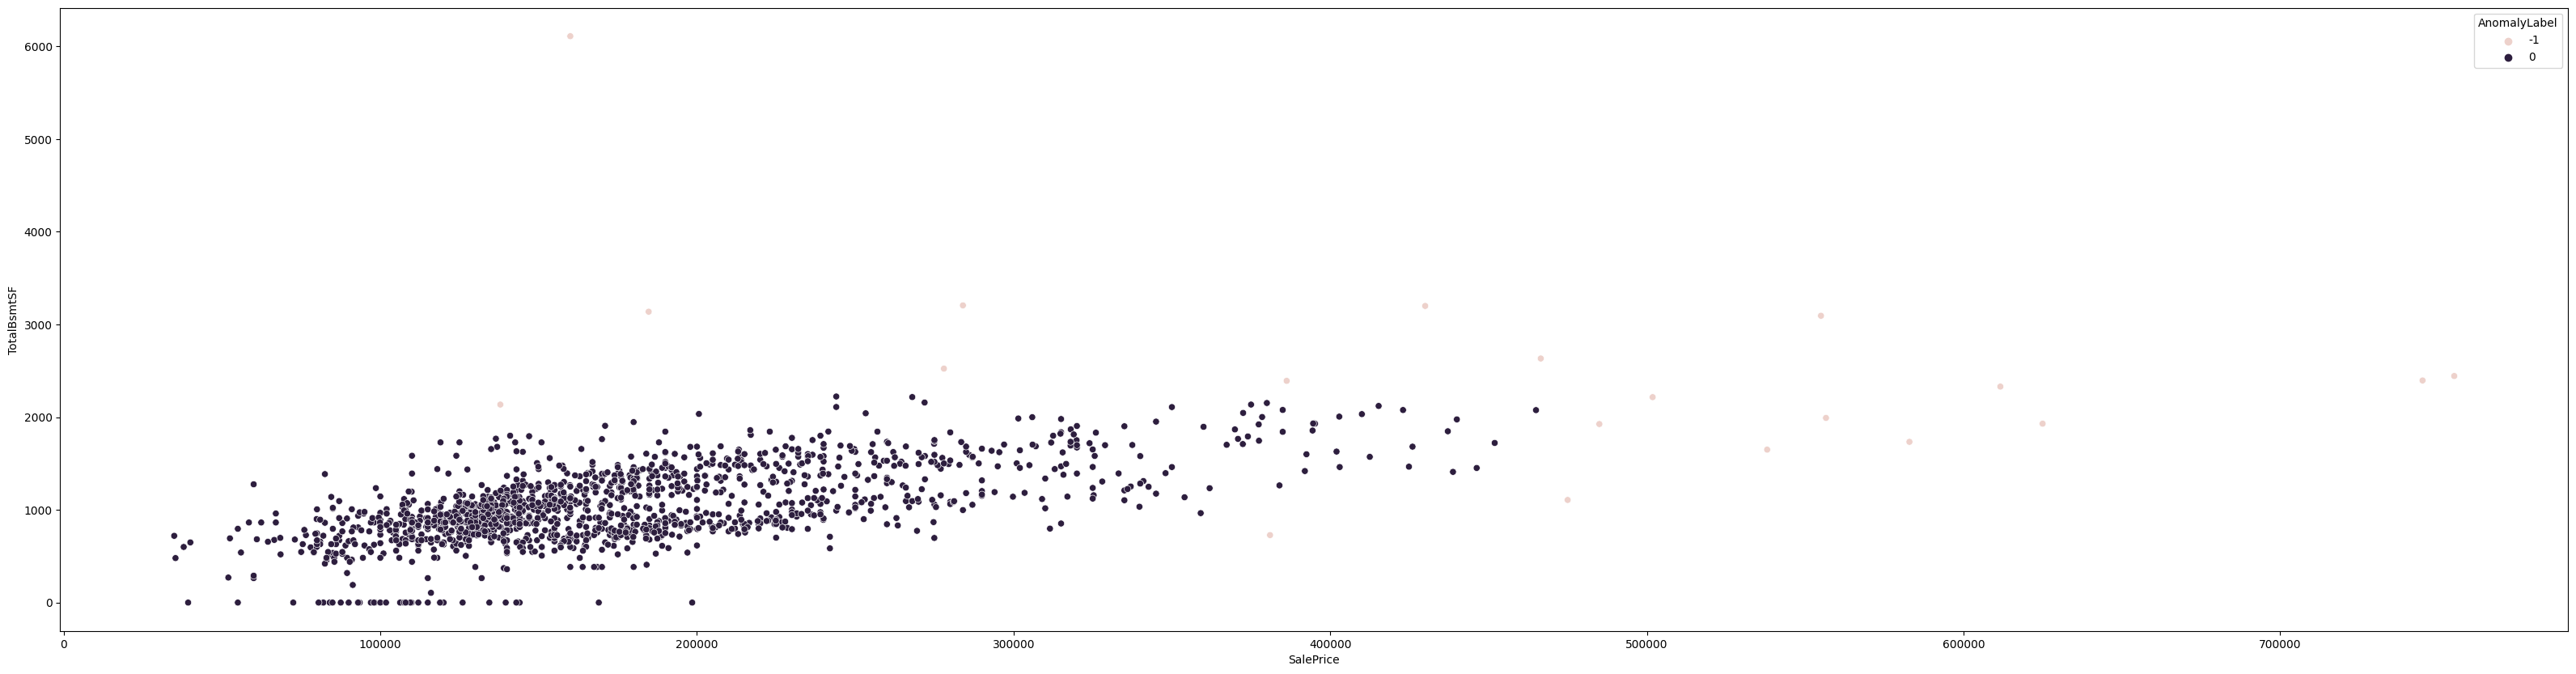

In [39]:
from sklearn.cluster import DBSCAN
from pyod.utils.utility import standardizer
import pandas as pd
from pyod.utils.utility import standardizer
df2=df[['SalePrice','TotalBsmtSF']]

dfn = standardizer(df2)
clustering = DBSCAN(eps=0.5, min_samples=4).fit(dfn)
anomaly_labels=clustering.labels_
anomaly_scores=clustering.labels_
df2['AnomalyLabel'] = anomaly_labels
sns.scatterplot(data=df2,y='TotalBsmtSF',x='SalePrice',hue='AnomalyLabel')
df_dbscan=df2[df2.AnomalyLabel==0]
plt.show()

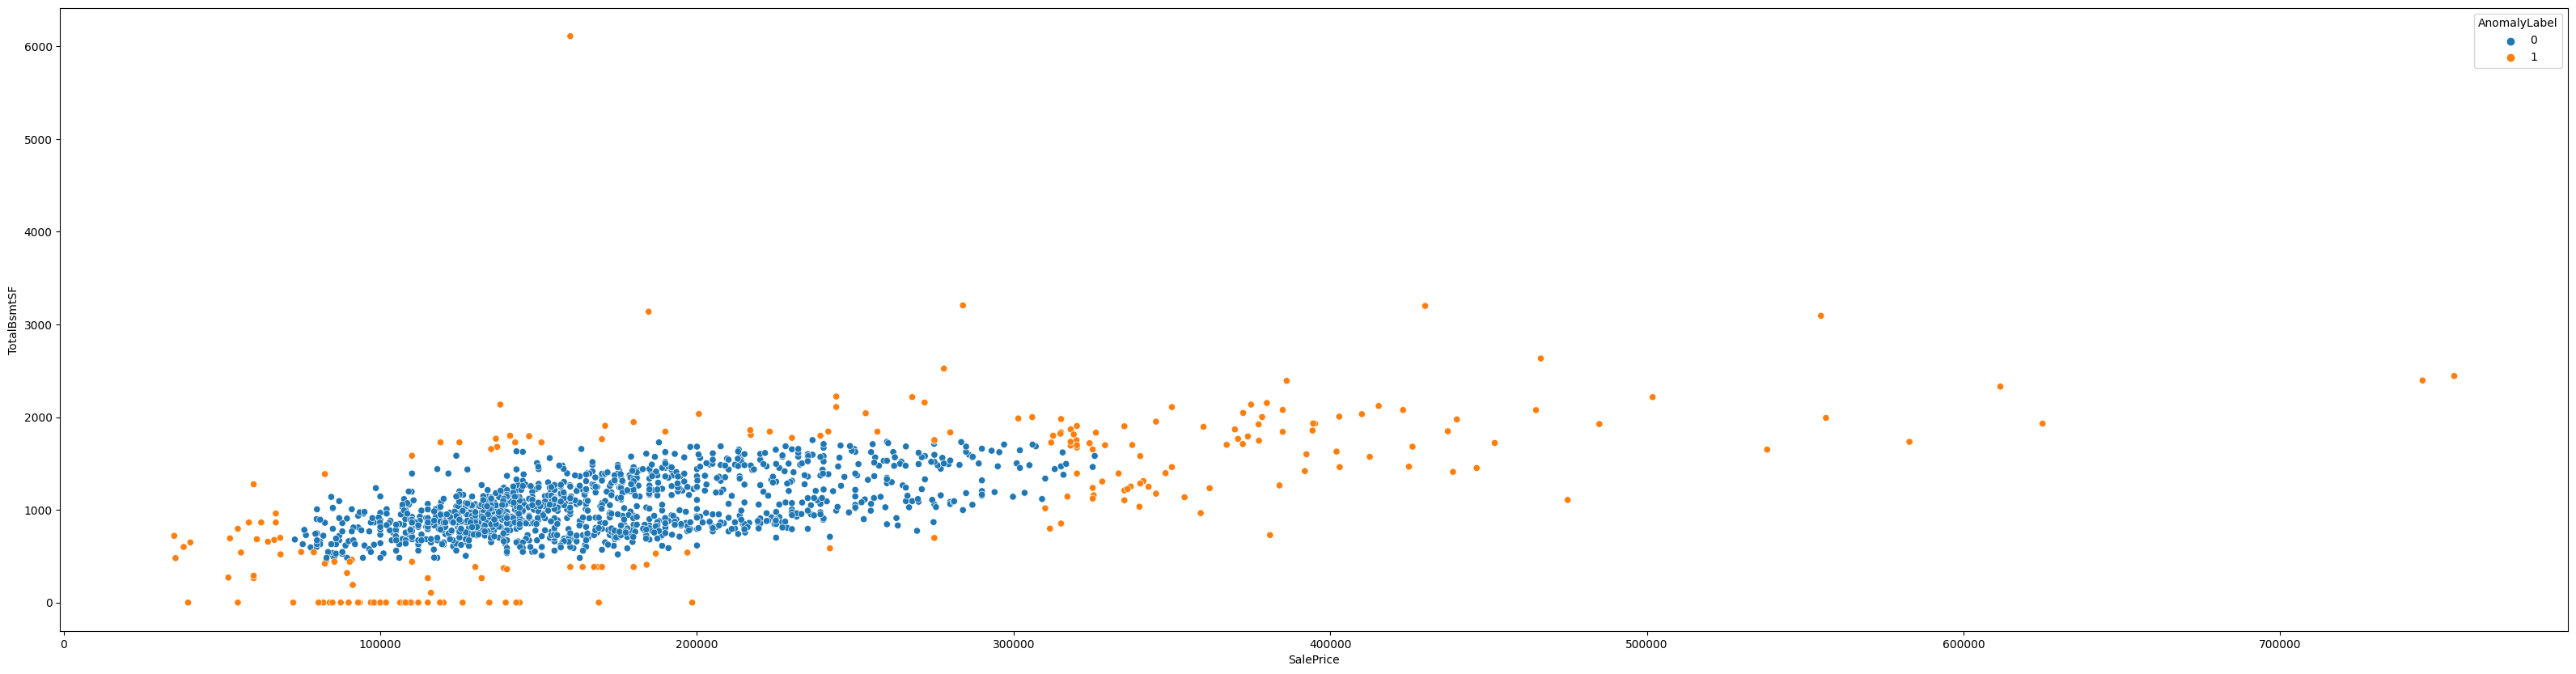

In [40]:
import pandas as pd
from pyod.models.iforest import IForest
from pyod.utils.utility import standardizer
from pyod.utils.data import evaluate_print
X=df2
# true_label=pd.read_csv("arrhythmia_true_labels.csv").to_numpy()
outliers_fraction =  0.15
# np.count_nonzero(true_label) / len(true_label)
X= standardizer(X)
# 100 trees, 256 subsamples
clf = IForest(contamination=outliers_fraction,n_estimators=100)
clf.fit(X)
anomaly_label=clf.labels_
# evaluate_print('IsolationForest', true_label, anomaly_label)
df2['AnomalyLabel'] = clf.labels_
sns.scatterplot(data=df2,y='TotalBsmtSF',x='SalePrice',hue='AnomalyLabel')
df_iso=df2[df2.AnomalyLabel==0]
plt.show()

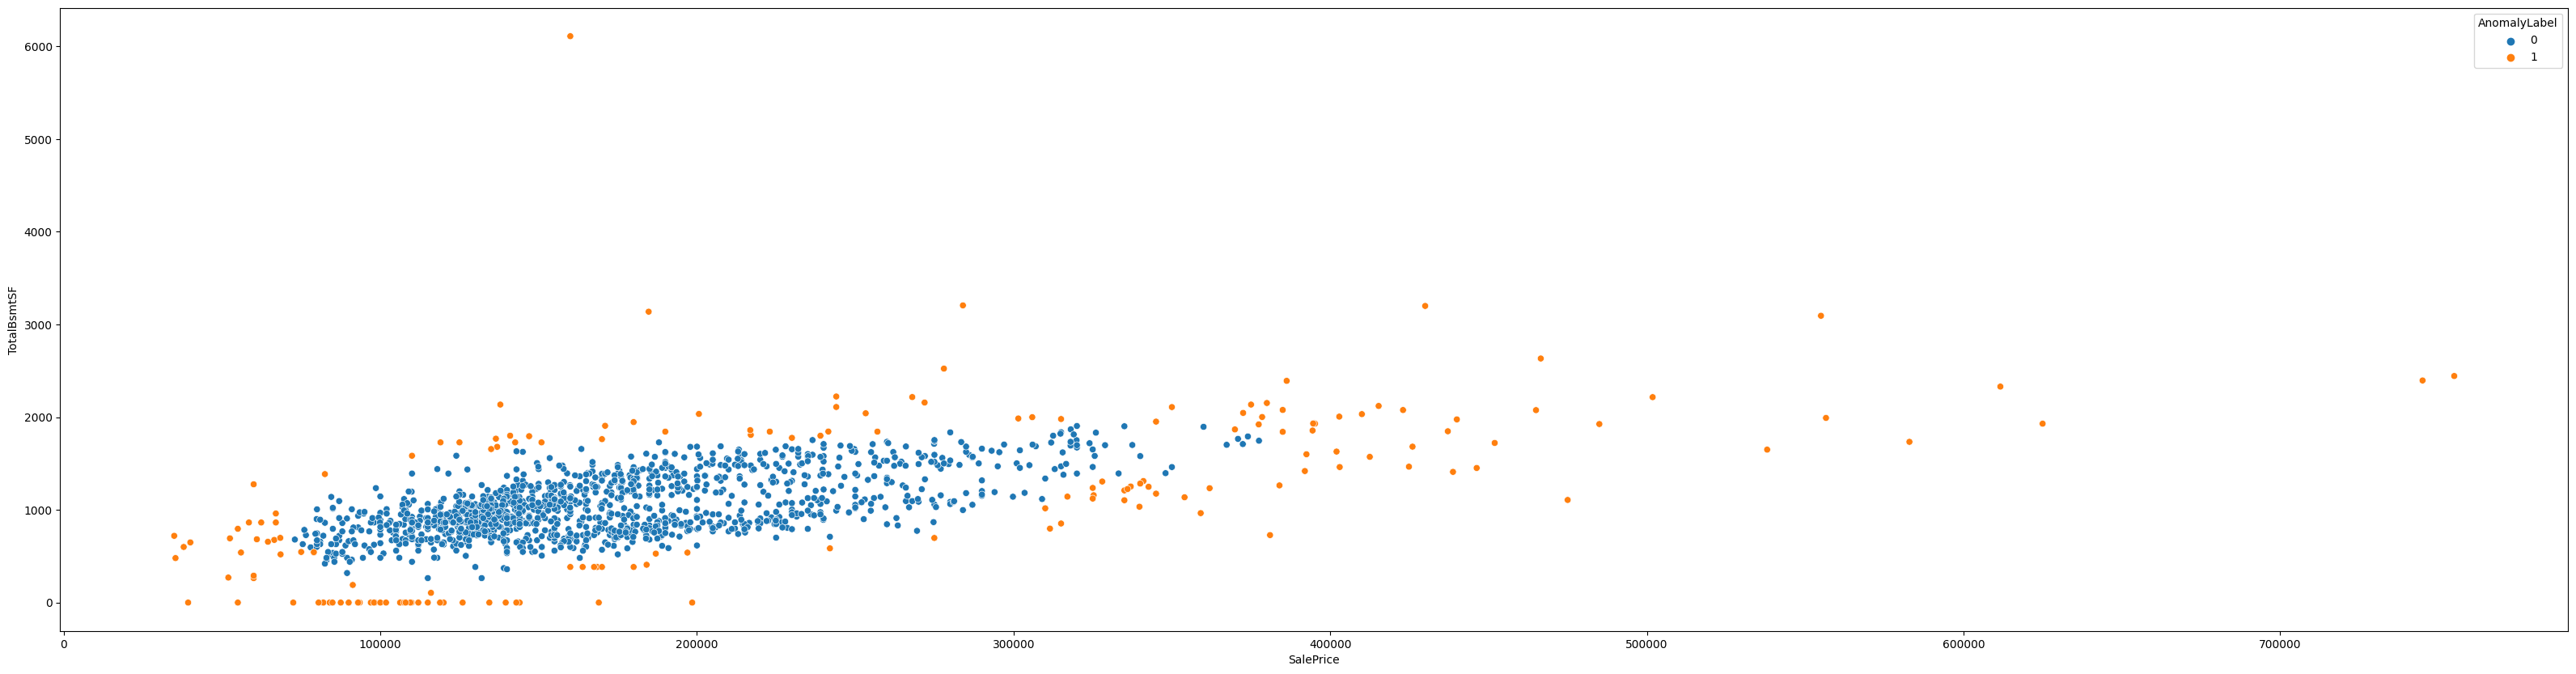

In [41]:
import pandas as pd
from pyod.models.ocsvm import OCSVM
from pyod.utils.utility import standardizer
from pyod.utils.data import evaluate_print
dfn = standardizer(df2)
clf = OCSVM(kernel ='rbf',contamination=3/25)
clf.fit(dfn)
df['AnomalyScore'] = clf.decision_scores_
df['AnomalyLabel'] = clf.labels_
df2['AnomalyLabel'] = clf.labels_
sns.scatterplot(data=df2,y='TotalBsmtSF',x='SalePrice',hue='AnomalyLabel')
df_ocsvm=df2[df2.AnomalyLabel==0]
plt.show()

In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.model_selection import train_test_split

def lin_reg(df_reg, algo):
    X=df_reg['TotalBsmtSF']
    y=df_reg['SalePrice']
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)
    model.fit(X_train.to_numpy().reshape(-1, 1), y_train)
    from sklearn.metrics import mean_squared_error, r2_score
    predictions = model.predict(X_test.to_numpy().reshape(-1,1))
    r2 = r2_score(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions)

    print(algo, ':  The r2 is: ', r2)
    print(algo, ':  The rmse is: ', rmse)
plt.show()

In [43]:
mydict={'knn': df_knn, 'ocsvm': df_ocsvm, 'dbscan': df_dbscan, 'lof': df_lof, 'iso': df_iso}
for k in mydict.keys():
    lin_reg(mydict[k],k)

knn :  The r2 is:  0.4256411703415093
knn :  The rmse is:  2605936671.889398
ocsvm :  The r2 is:  0.3515520486989788
ocsvm :  The rmse is:  1988978382.3111546
dbscan :  The r2 is:  0.39312962211234126
dbscan :  The rmse is:  2902168475.8546414
lof :  The r2 is:  0.45315651328097384
lof :  The rmse is:  3867184579.330737
iso :  The r2 is:  0.32522967209127973
iso :  The rmse is:  1896319466.9856286


### Linear Regression

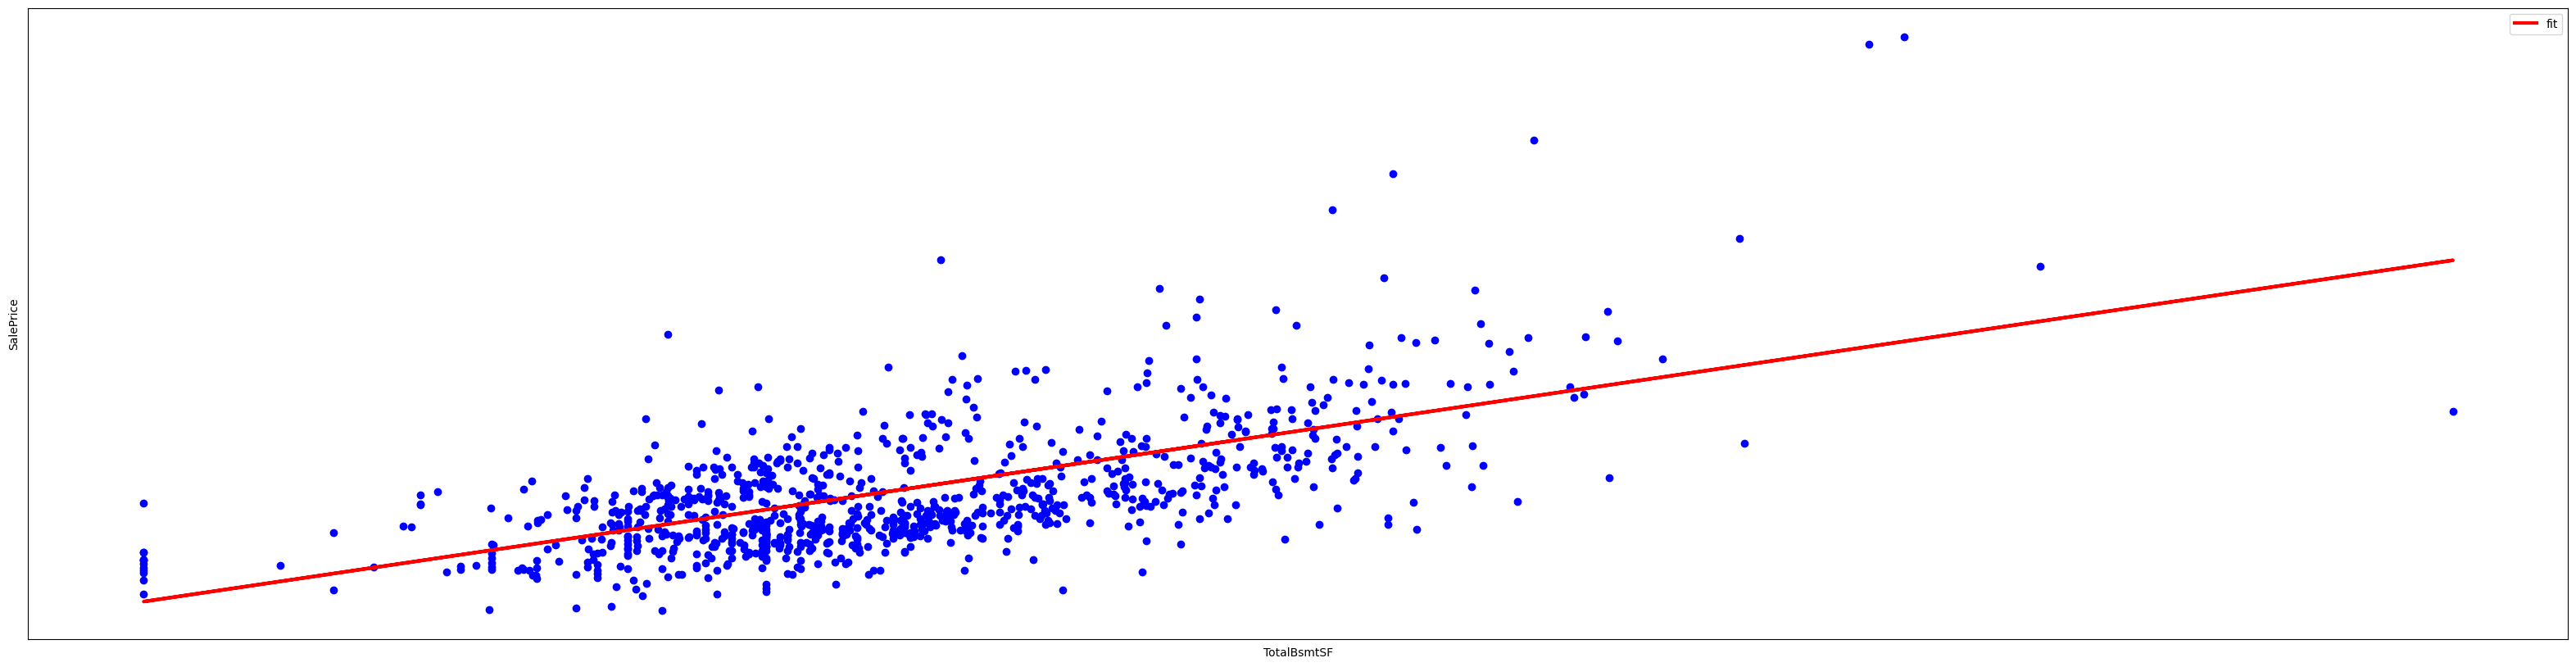

In [44]:
df_reg=df_lof
X=df_reg['TotalBsmtSF']
y=df_reg['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)
fitted=model.fit(X_train.to_numpy().reshape(-1, 1), y_train)
from sklearn.metrics import mean_squared_error, r2_score
predictions = model.predict(X_test.to_numpy().reshape(-1,1))
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions)


plt.scatter(X_test, y_test, color="blue")
plt.plot(X_test, predictions, color="red", linewidth=3,label='fit')
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.xticks(())
plt.yticks(())
plt.legend()
plt.show()

In [45]:
import statsmodels.api as sm
from scipy import stats

X = X_train
y = y_train

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     460.6
Date:                Mon, 10 Apr 2023   Prob (F-statistic):           2.02e-69
Time:                        01:11:27   Log-Likelihood:                -5209.5
No. Observations:                 420   AIC:                         1.042e+04
Df Residuals:                     418   BIC:                         1.043e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.562e+04   7275.601      6.270      

In [46]:
df_lof

,SalePrice,TotalBsmtSF,AnomalyScore,AnomalyLabel
0,208500,856,1.293806,0
1,181500,1262,1.225593,0
2,223500,920,1.254538,0
3,140000,756,1.173079,0
4,250000,1145,1.029439,0
...,...,...,...,...
1455,175000,953,0.961161,0
1456,210000,1542,0.958402,0
1457,266500,1152,1.043595,0
1458,142125,1078,1.049931,0


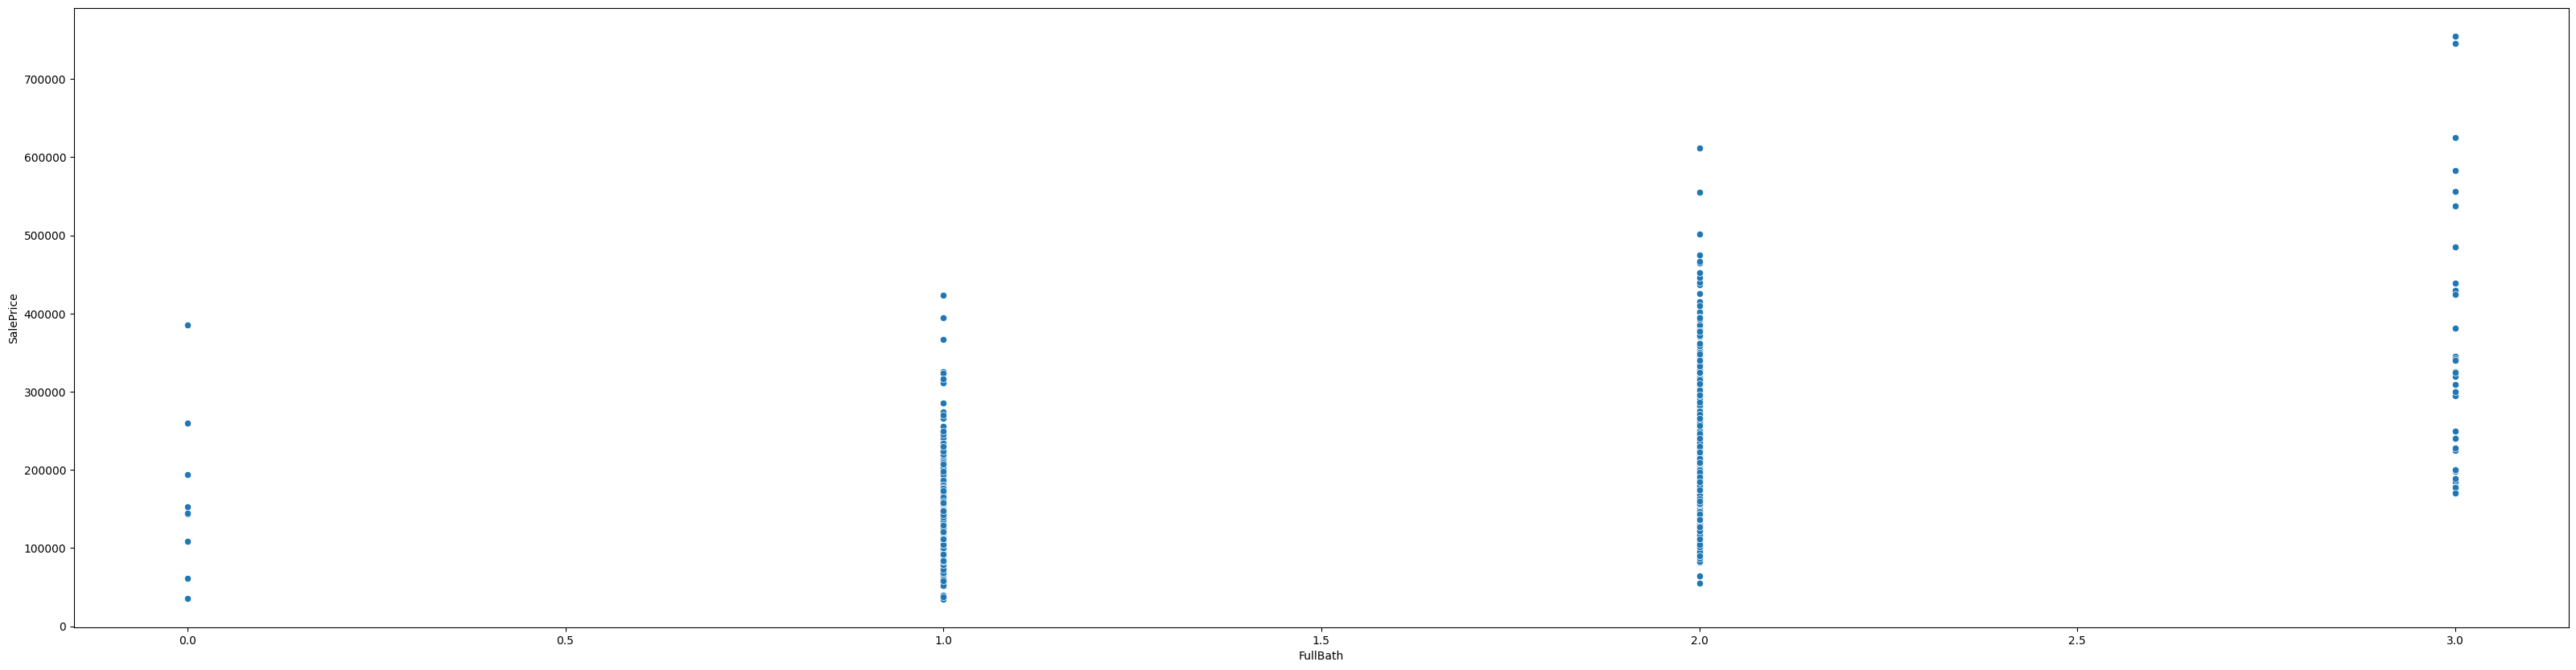

In [47]:
sns.scatterplot(data=df_numeric,x='FullBath',y='SalePrice')
plt.show()

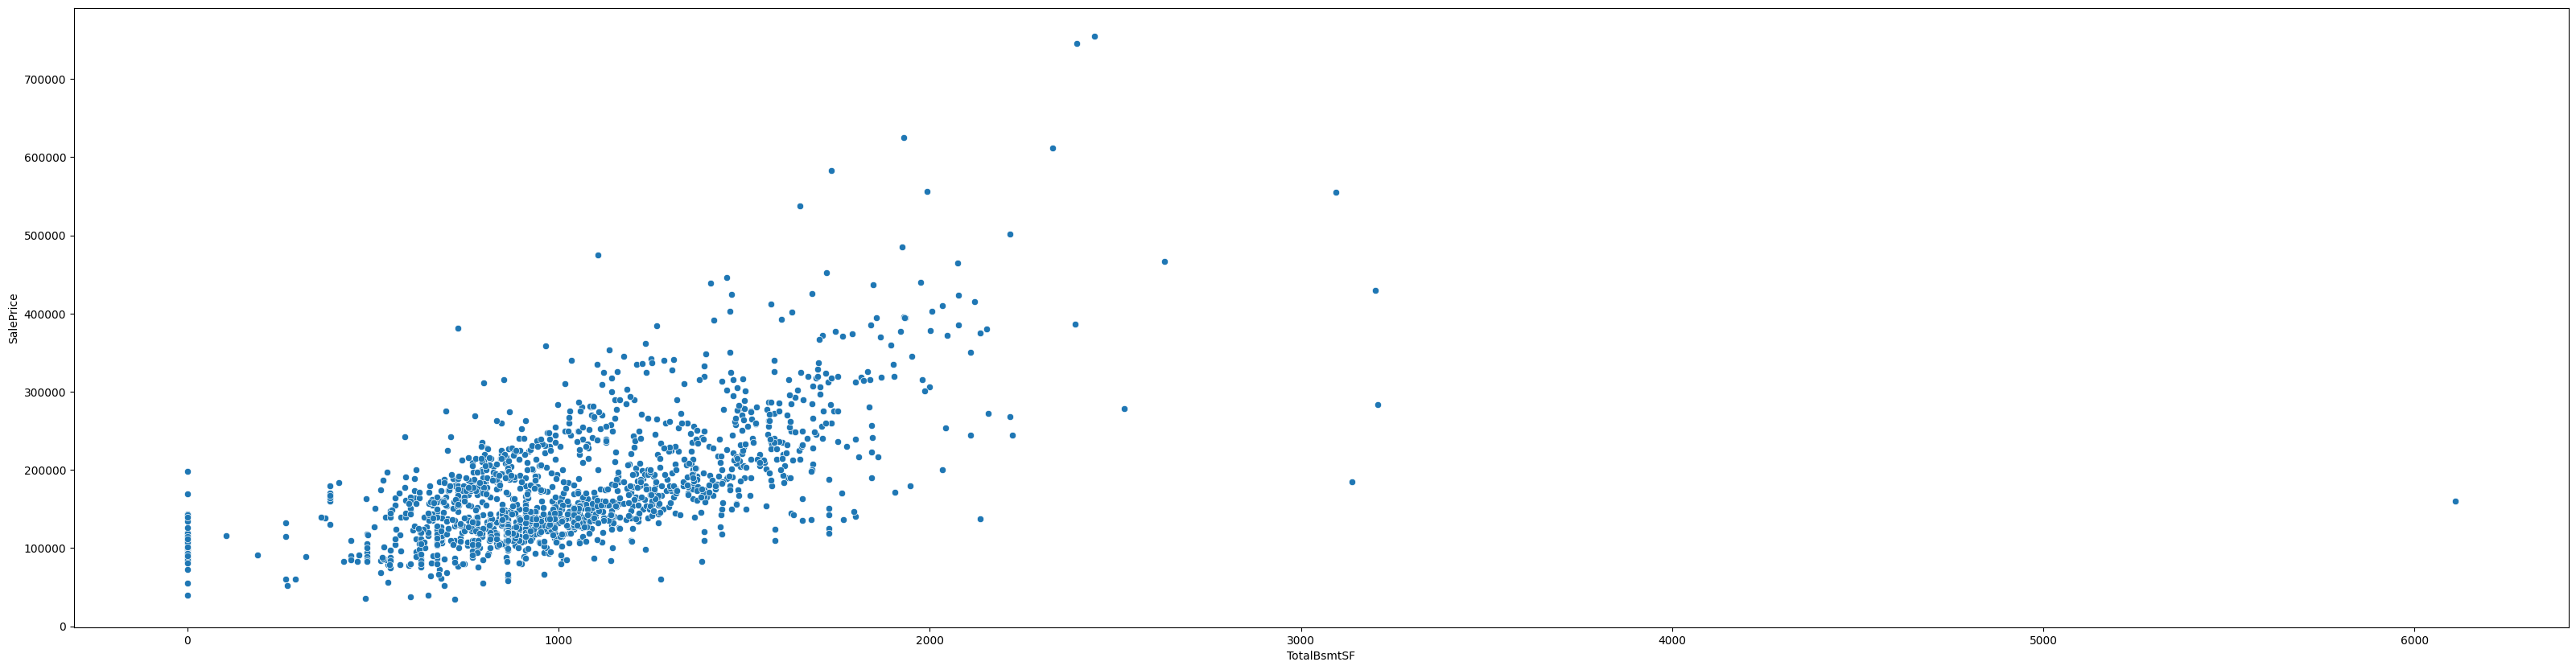

In [48]:
sns.scatterplot(data=df_numeric,x='TotalBsmtSF',y='SalePrice')
plt.show()

In [49]:
coh = CategoricalOneHot(list_key_words=['BldgType'])
df2=df[['SalePrice','TotalBsmtSF','BldgType','FullBath']]
df_categorical_ohe=(coh.fit_transform(df2))

clf = LOF(n_neighbors=5,contamination=1/25)
clf.fit(df_categorical_ohe)
df_categorical_ohe['AnomalyScore'] = clf.decision_scores_
df_categorical_ohe['AnomalyLabel'] = clf.labels_
df_lof=df_categorical_ohe[df_categorical_ohe.AnomalyLabel==0]
df_reg=df_lof
X=df_reg[['TotalBsmtSF','FullBath']]
y=df_reg['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)
fitted=model.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error, r2_score
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions)
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     266.4
Date:                Mon, 10 Apr 2023   Prob (F-statistic):           2.90e-75
Time:                        01:11:28   Log-Likelihood:                -5167.1
No. Observations:                 420   AIC:                         1.034e+04
Df Residuals:                     417   BIC:                         1.035e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -1.76e+04   9144.822     -1.925      

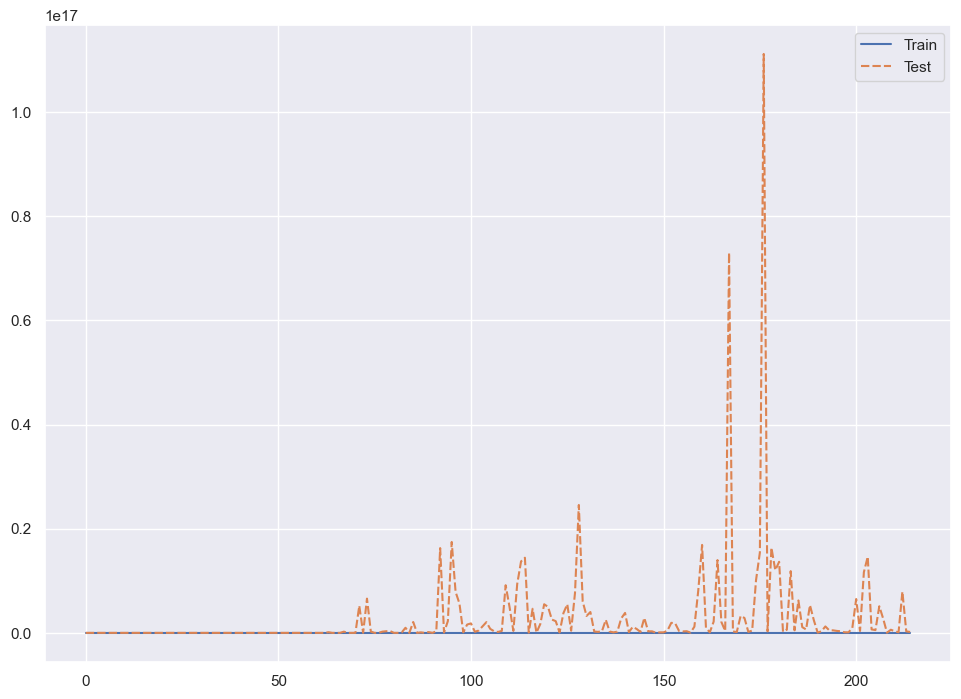

In [50]:
import math
sns.set(rc={'figure.figsize':(11.7,8.27)})

coh = CategoricalOneHot(list_key_words=list(df_categorical2.columns))
df_categorical_ohe=(coh.fit_transform(df_categorical2))
df2=df_numeric_scaler.apply(lambda x: x.fillna(x.mean()),axis=0)
clf = LOF(n_neighbors=5,contamination=1/25)
clf.fit(df2)
df2['AnomalyLabel'] = clf.labels_
df2=pd.concat([df2,df_categorical_ohe],axis=1)
df2
df_lof=df2[df2.AnomalyLabel==0]
df_reg=df_lof
feat_list=[]
aic_dict=[]
r2_dict=[]
rmse_dict=[]
rmse_train_dict=[]
aic_last=1000000
r2_last=0
cols=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
        'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold']+list(df_categorical_ohe.columns)
for var in list(cols):
    feat_list.append(var)
    X=df_reg[feat_list]
    y=df_reg['SalePrice']
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)
    model = LinearRegression()
    fitted=model.fit(X_train, y_train)
    from sklearn.metrics import mean_squared_error, r2_score
    predictions = model.predict(X_test.dropna())
    r2 = r2_score(y_test, predictions)
    
    rmse = math.sqrt(mean_squared_error(y_test, predictions))
    
    train_predictions = model.predict(X_train)
    rmse_train = math.sqrt(mean_squared_error(y_train, train_predictions))
#     X2 = sm.add_constant(X_train)
#     est = sm.OLS(y_train, X2)
#     est2 = est.fit()
# #     if(est2.rsquared_adj > r2_last):
#     r2_last=est2.rsquared_adj
    aic_dict.append(est2.aic)
    r2_dict.append(r2_last)
    rmse_dict.append(rmse)
    rmse_train_dict.append(rmse_train)
#Test vs Train

tt_df=pd.DataFrame({'var':list(cols),'Test': rmse_dict, 'Train':rmse_train_dict})
tt_df2=tt_df.sort_values('Train',ascending=False)[['Train','Test']]
sns.lineplot(data=tt_df2)    
plt.show()

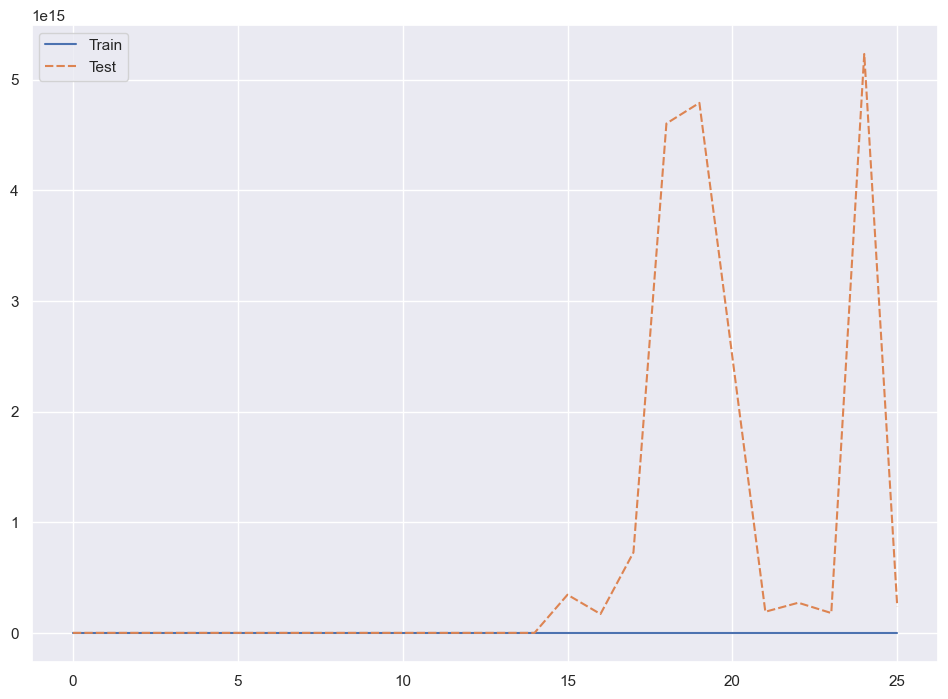

In [51]:
import math
coh = CategoricalOneHot(list_key_words=list(df_categorical2.columns))
df_categorical_ohe=(coh.fit_transform(df_categorical2))
df2=df_numeric_scaler.apply(lambda x: x.fillna(x.mean()),axis=0)
clf = LOF(n_neighbors=5,contamination=1/25)
clf.fit(df2)
df2['AnomalyLabel'] = clf.labels_
df2=pd.concat([df2,df_categorical_ohe],axis=1)
df2
df_lof=df2[df2.AnomalyLabel==0]
df_reg=df_lof
feat_list=[]
aic_dict=[]
r2_dict=[]
rmse_dict=[]
rmse_train_dict=[]
aic_last=1000000
r2_last=0
cols=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
        'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold']+list(df_categorical_ohe.columns)
final_cols=[]
for var in list(cols):
    feat_list.append(var)
    X=df_reg[feat_list]
    y=df_reg['SalePrice']
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)
    fitted=model.fit(X_train, y_train)
    from sklearn.metrics import mean_squared_error, r2_score
    predictions = model.predict(X_test)
    r2 = r2_score(y_test, predictions)
    rmse = math.sqrt(mean_squared_error(y_test, predictions))
    train_predictions = model.predict(X_train)
    rmse_train = math.sqrt(mean_squared_error(y_train, train_predictions))
    X2 = sm.add_constant(X_train)
    est = sm.OLS(y_train, X2)
    est2 = est.fit()
    if(est2.rsquared_adj > r2_last):
        r2_last=est2.rsquared_adj
        aic_dict.append(est2.aic)
        r2_dict.append(r2_last)
        rmse_dict.append(rmse)
        final_cols.append(var)
        rmse_train_dict.append(rmse_train)
#Test vs Train

tt_df=pd.DataFrame({'var':list(final_cols),'Test': rmse_dict, 'Train':rmse_train_dict})
tt_df2=tt_df.sort_values('Train',ascending=False)[['Train','Test']]
sns.lineplot(data=tt_df2)
plt.show()

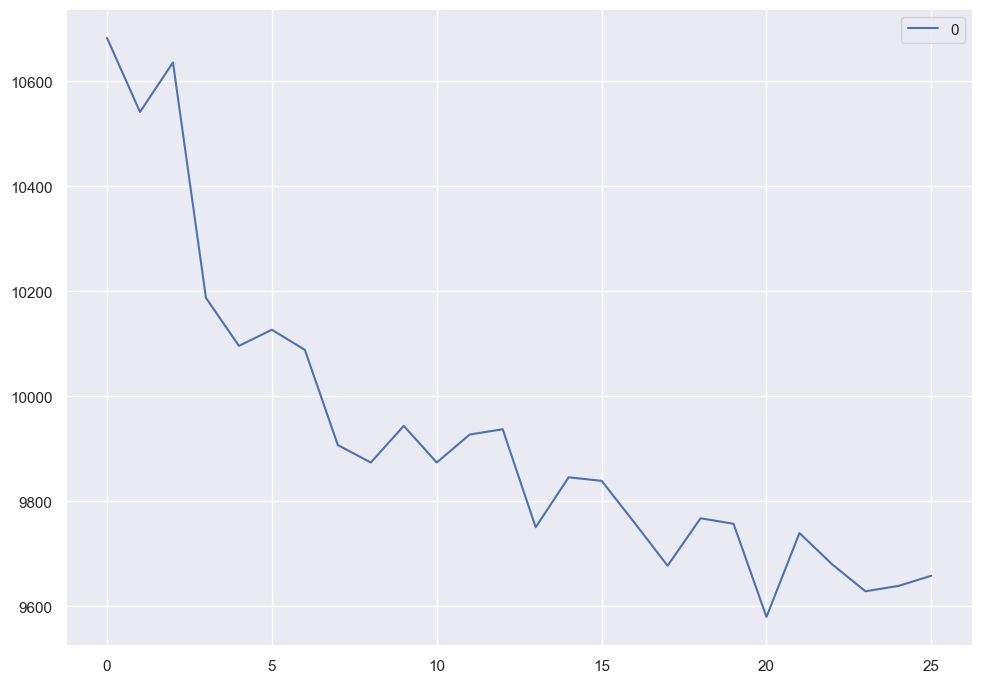

In [52]:
pd.DataFrame(aic_dict).plot()
plt.show()

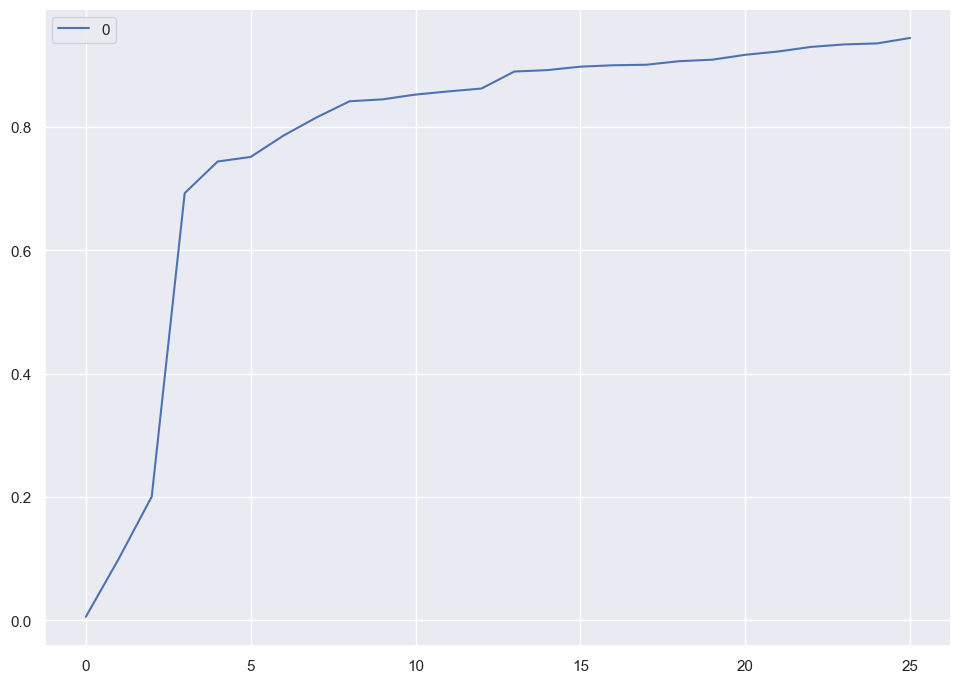

In [53]:
pd.DataFrame(r2_dict).plot()
plt.show()

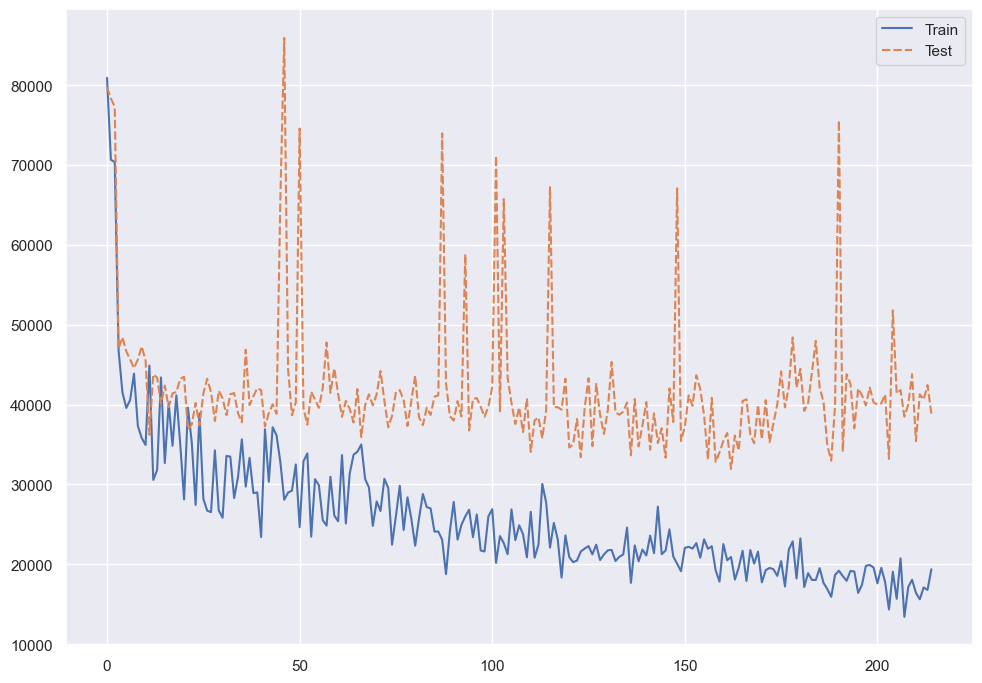

In [54]:
import math
from sklearn.linear_model import Lasso
#Lasso regularization


coh = CategoricalOneHot(list_key_words=list(df_categorical2.columns))
df_categorical_ohe=(coh.fit_transform(df_categorical2))
df2=df_numeric_scaler.apply(lambda x: x.fillna(x.mean()),axis=0)
clf = LOF(n_neighbors=5,contamination=1/25)
clf.fit(df2)
df2['AnomalyLabel'] = clf.labels_
df2=pd.concat([df2,df_categorical_ohe],axis=1)
df2
df_lof=df2[df2.AnomalyLabel==0]
df_reg=df_lof
feat_list=[]
aic_dict=[]
r2_dict=[]
rmse_dict=[]
rmse_train_dict=[]
aic_last=1000000
r2_last=0
cols=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
        'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold']+list(df_categorical_ohe.columns)
final_cols=[]
for var in list(cols):
    feat_list.append(var)
    X=df_reg[feat_list]
    y=df_reg['SalePrice']
    model = Lasso(alpha=5)
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)
    fitted=model.fit(X_train, y_train)
    from sklearn.metrics import mean_squared_error, r2_score
    predictions = model.predict(X_test)
    r2 = r2_score(y_test, predictions)
    n=len(X)
    p=len(feat_list)
    adjr2 = 1-(1-r2)*(n-1)/(n-p-1)
    rmse = math.sqrt(mean_squared_error(y_test, predictions))
    train_predictions = model.predict(X_train)
    rmse_train = math.sqrt(mean_squared_error(y_train, train_predictions))
    X2 = sm.add_constant(X_train)
    est = sm.OLS(y_train, X2)
    est2 = est.fit()
    r2_last=est2.rsquared_adj
    aic_dict.append(est2.aic)
    r2_dict.append(adjr2)
    rmse_dict.append(rmse)
    final_cols.append(var)
    rmse_train_dict.append(rmse_train)
#Test vs Train

tt_df=pd.DataFrame({'var':list(final_cols),'Test': rmse_dict, 'Train':rmse_train_dict})
tt_df2=tt_df.sort_values('Train',ascending=False)[['Train','Test']]
sns.lineplot(data=tt_df2)
plt.show()

In [55]:
pd.DataFrame(r2_dict).plot()

<AxesSubplot:>

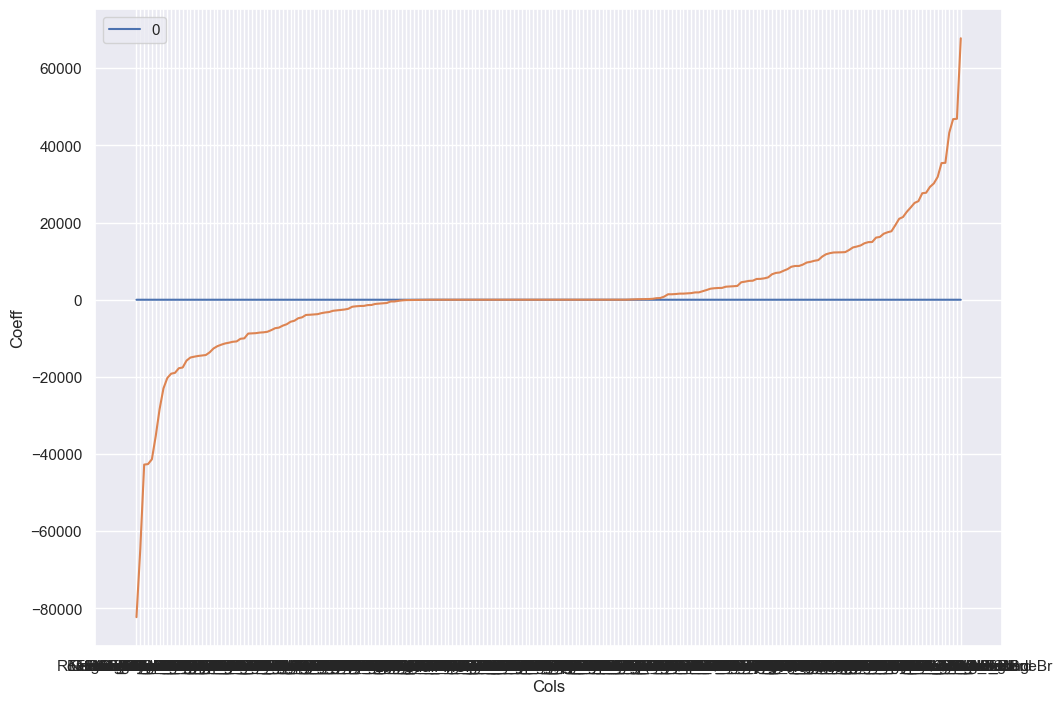

In [56]:
coeff=pd.DataFrame({"Cols":final_cols,"Coeff": fitted.coef_}).sort_values('Coeff')
sns.lineplot(data=coeff, x="Cols",y="Coeff")
plt.show()

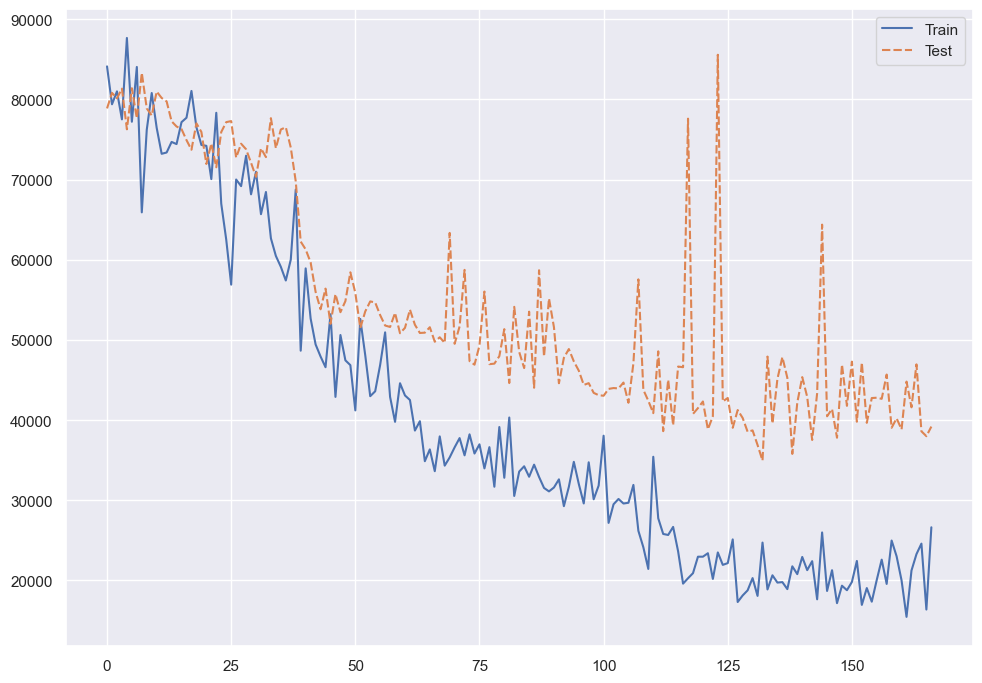

In [57]:
#Lasso after removing the features which have 0 value

lets_remove=coeff[coeff.Coeff!=0]['Cols'].to_list()
import math
from sklearn.linear_model import Lasso

coh = CategoricalOneHot(list_key_words=list(df_categorical2.columns))
df_categorical_ohe=(coh.fit_transform(df_categorical2))
df2=df_numeric_scaler.apply(lambda x: x.fillna(x.mean()),axis=0)
clf = LOF(n_neighbors=5,contamination=1/25)
clf.fit(df2)
df2['AnomalyLabel'] = clf.labels_
df2=pd.concat([df2,df_categorical_ohe],axis=1)
df2
df_lof=df2[df2.AnomalyLabel==0]
df_reg=df_lof
feat_list=[]
aic_dict=[]
r2_dict=[]
rmse_dict=[]
rmse_train_dict=[]
aic_last=1000000
r2_last=0
cols=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
        'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold']+list(df_categorical_ohe.columns)
final_cols=[]
for var in list(lets_remove):
    feat_list.append(var)
    X=df_reg[feat_list]
    y=df_reg['SalePrice']
    model = Lasso(alpha=5)
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)
    fitted=model.fit(X_train, y_train)
    from sklearn.metrics import mean_squared_error, r2_score
    predictions = model.predict(X_test)
    r2 = r2_score(y_test, predictions)
    n=len(X)
    p=len(feat_list)
    adjr2 = 1-(1-r2)*(n-1)/(n-p-1)
    rmse = math.sqrt(mean_squared_error(y_test, predictions))
    train_predictions = model.predict(X_train)
    rmse_train = math.sqrt(mean_squared_error(y_train, train_predictions))
    X2 = sm.add_constant(X_train)
    est = sm.OLS(y_train, X2)
    est2 = est.fit()
    r2_last=est2.rsquared_adj
    aic_dict.append(est2.aic)
    r2_dict.append(adjr2)
    rmse_dict.append(rmse)
    final_cols.append(var)
    rmse_train_dict.append(rmse_train)
#Test vs Train

tt_df=pd.DataFrame({'var':list(final_cols),'Test': rmse_dict, 'Train':rmse_train_dict})
tt_df2=tt_df.sort_values('Train',ascending=False)[['Train','Test']]
sns.lineplot(data=tt_df2)
plt.show()

# Principle Component Analysis

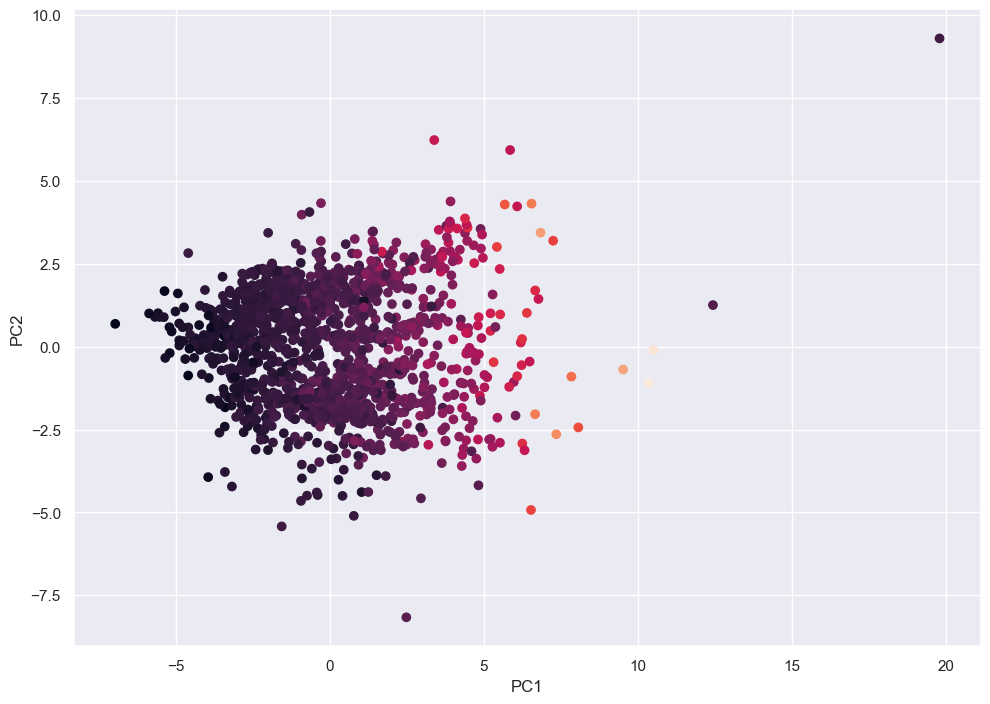

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from numpy import linalg as LA
import pandas as pd
from scipy import stats
df2=df_numeric_scaler.apply(lambda x: x.fillna(x.mean()),axis=0)
cols=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
        'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold']
X = df2[cols]
y = df2['SalePrice']
#In general a good idea is to scale the data
X = stats.zscore(X)
pca = PCA(n_components=3)
x_new = pca.fit_transform(X)

plt.scatter(x_new[:,0], x_new[:,1], c = y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
#Create the biplot function
# def biplot(score,coeff,labels=None):
#     xs = score[:,0]
#     ys = score[:,1]
#     n = coeff.shape[0]
#     scalex = 1.0/(xs.max() - xs.min())
#     scaley = 1.0/(ys.max() - ys.min())
#     plt.scatter(xs * scalex,ys * scaley, c = y)
#     for i in range(n):
#         plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
#         if labels is None:
#             plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
#         else:
#             plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
# plt.xlim(-1,1)
# plt.ylim(-1,1)
# plt.xlabel("PC{}".format(1))
# plt.ylabel("PC{}".format(2))
# plt.grid()


# #Call the function. Use only the 2 PCs.
# biplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

In [59]:
newdf=pd.DataFrame(x_new)
newdf

,0,1,2
0,1.022127,-0.866431,-0.406431
1,0.006447,1.323174,1.155032
2,1.251823,-0.657283,-0.536917
3,0.251321,-0.519618,0.076021
4,4.255114,-1.084773,-0.042121
...,...,...,...
1455,0.442494,-1.865706,-1.334031
1456,2.434887,2.266016,1.389890
1457,0.793005,-2.837460,2.577883
1458,-2.849318,2.202038,2.468892


In [60]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X=newdf
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)
fitted=model.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error, r2_score
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = math.sqrt(mean_squared_error(y_test, predictions))

rmse

43332.02956407804

# Decision Tree

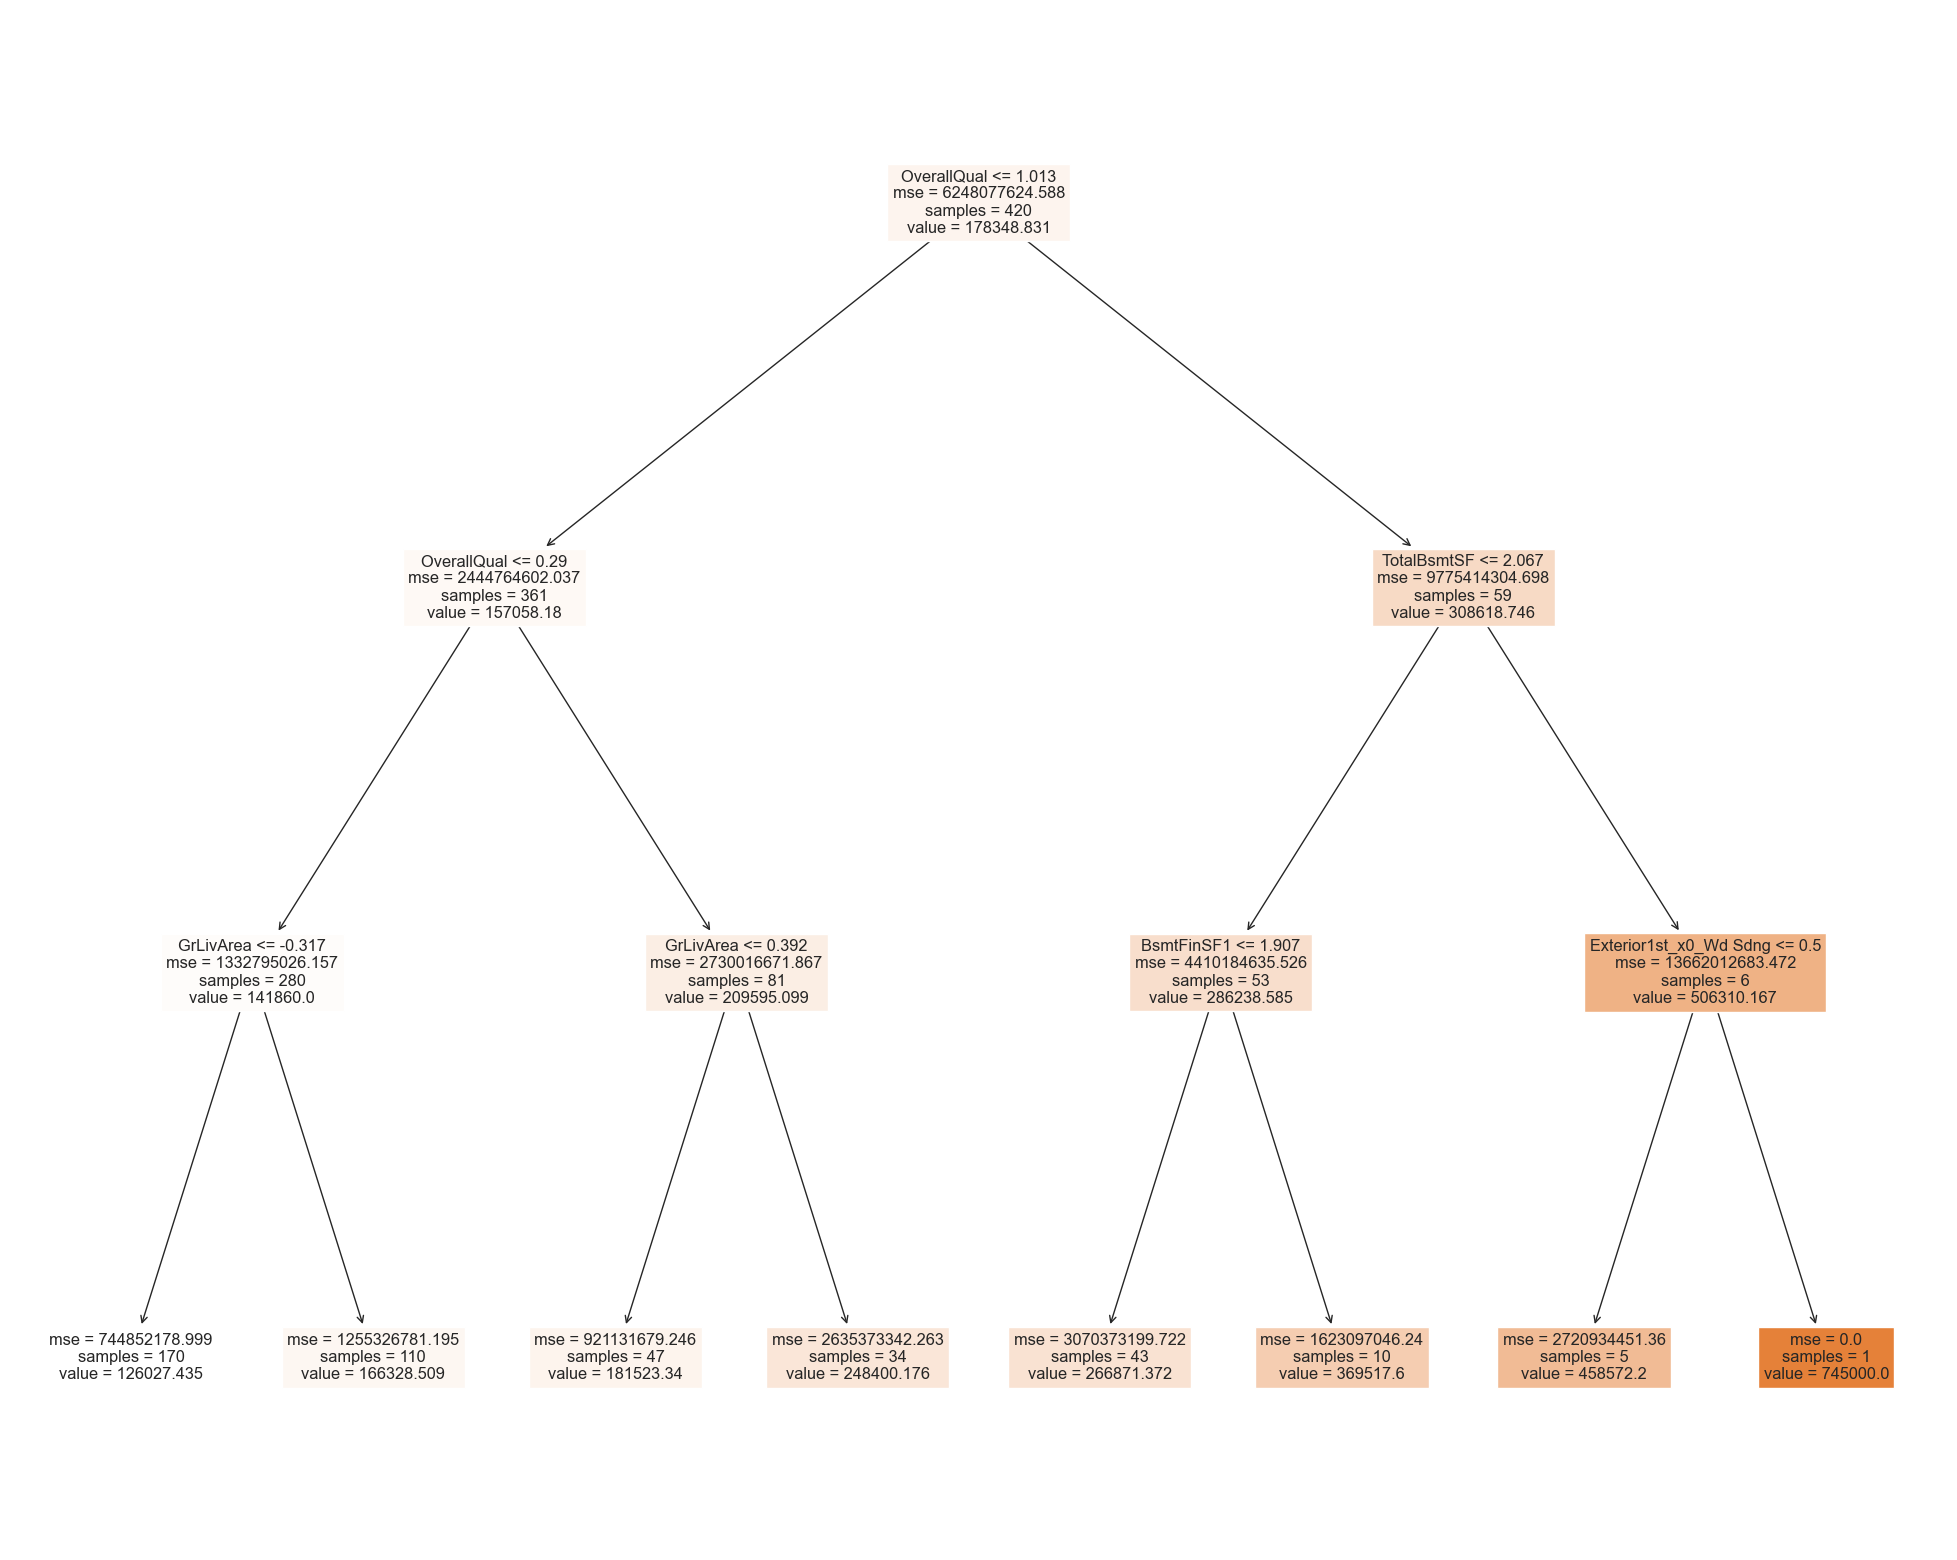

In [61]:
import math
from sklearn import tree

from sklearn.tree import DecisionTreeRegressor
coh = CategoricalOneHot(list_key_words=list(df_categorical2.columns))
df_categorical_ohe=(coh.fit_transform(df_categorical2))
df2=df_numeric_scaler.apply(lambda x: x.fillna(x.mean()),axis=0)
clf = LOF(n_neighbors=5,contamination=1/25)
clf.fit(df2)
df2['AnomalyLabel'] = clf.labels_
df2=pd.concat([df2,df_categorical_ohe],axis=1)
df2
df_lof=df2[df2.AnomalyLabel==0]
df_reg=df_lof
feat_list=[]
aic_dict=[]
r2_dict=[]
rmse_dict=[]
rmse_train_dict=[]
aic_last=1000000
r2_last=0
cols=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
        'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold']+list(df_categorical_ohe.columns)
final_cols=[]
for var in list(cols):
    feat_list.append(var)
    X=df_reg[feat_list]
    y=df_reg['SalePrice']
    model = DecisionTreeRegressor(max_depth=3)
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)
    fitted=model.fit(X_train, y_train)
    from sklearn.metrics import mean_squared_error, r2_score
    predictions = model.predict(X_test)
    r2 = r2_score(y_test, predictions)
    n=len(X)
    p=len(feat_list)
    adjr2 = 1-(1-r2)*(n-1)/(n-p-1)
    rmse = math.sqrt(mean_squared_error(y_test, predictions))
    train_predictions = model.predict(X_train)
    rmse_train = math.sqrt(mean_squared_error(y_train, train_predictions))
    X2 = sm.add_constant(X_train)
    r2_dict.append(adjr2)
    rmse_dict.append(rmse)
    final_cols.append(var)
    rmse_train_dict.append(rmse_train)
#Test vs Train

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, feature_names=final_cols, filled=True)

plt.show()

### Logistic Regression

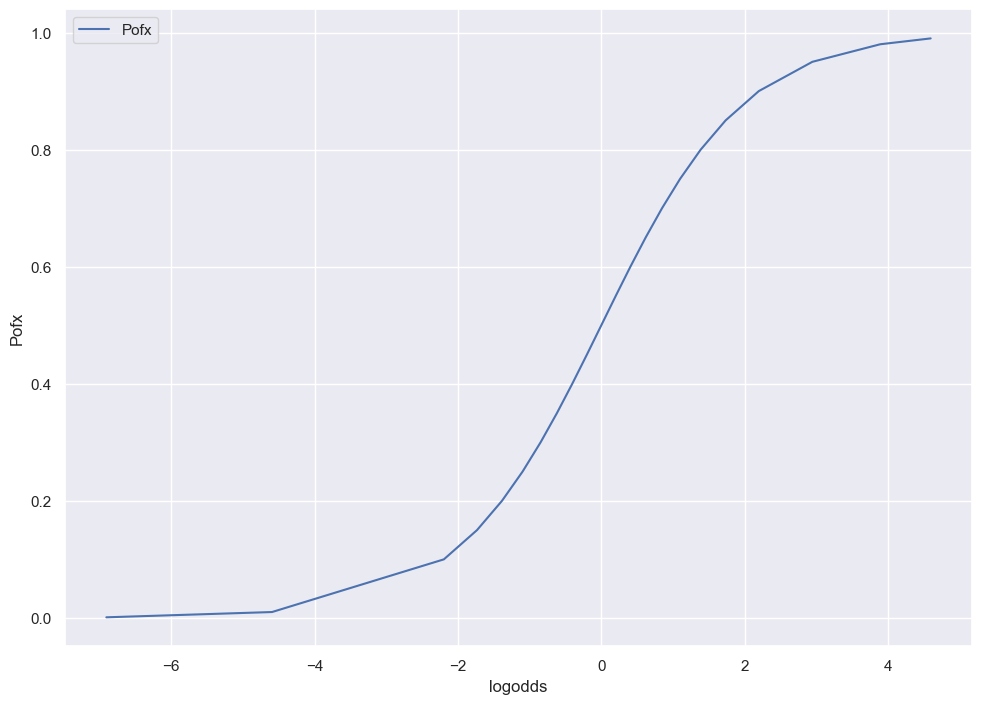

In [62]:
p=[0.001, 0.01, 0.1, 0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,0.98,0.99]
pneg=[1-a for a in p]
pdf=pd.DataFrame({'Pofx':p,'oneminusPofx':[1-a for a in p]})
pdf['odds']=pdf['Pofx']/pdf['oneminusPofx']
pdf['logodds']=np.log(pdf['odds'])
pdf.plot(x='logodds',y='Pofx',ylabel='Pofx')
plt.show()

In [63]:
import math
from sklearn import tree
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
coh = CategoricalOneHot(list_key_words=list(df_categorical2.columns))
df_categorical_ohe=(coh.fit_transform(df_categorical2))
df2=df_numeric_scaler.apply(lambda x: x.fillna(x.mean()),axis=0)
clf = LOF(n_neighbors=5,contamination=1/25)
clf.fit(df2)
df2['AnomalyLabel'] = clf.labels_
df2=pd.concat([df2,df_categorical_ohe],axis=1)
df2
df_lof=df2[df2.AnomalyLabel==0]
df_reg=df_lof
feat_list=[]
aic_dict=[]
r2_dict=[]
rmse_dict=[]
rmse_train_dict=[]
aic_last=1000000
r2_last=0
cols=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
        'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold']+list(df_categorical_ohe.columns)
final_cols=[]
# for var in list(cols):
feat_list.append(var)
X=df_reg[feat_list]
y=df_reg['SalePrice']
model = MLPRegressor(hidden_layer_sizes=(100, 100), tol=1e-2, max_iter=500, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)
fitted=model.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error, r2_score
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
n=len(X)
p=len(feat_list)
adjr2 = 1-(1-r2)*(n-1)/(n-p-1)
rmse = math.sqrt(mean_squared_error(y_test, predictions))
train_predictions = model.predict(X_train)
rmse_train = math.sqrt(mean_squared_error(y_train, train_predictions))
X2 = sm.add_constant(X_train)
r2_dict.append(adjr2)
rmse_dict.append(rmse)
final_cols.append(var)
rmse_train_dict.append(rmse_train)
#Test vs Train

# fig = plt.figure(figsize=(25,20))
# _ = tree.plot_tree(model, feature_names=final_cols, filled=True)

# plt.show()

rmse_train_dict

[161484.79260104577]

In [64]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]
            
        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to add
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]
            
        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

statsmodels==0.12.2
seaborn==0.12.2
scipy==1.7.3
scikit-learn==0.24.0
numpy==1.20.0
matplotlib==3.5.3
hypertools==0.8.0
gensim==3.8.1
pyod==0.8.6
pandas==1.3.0
